**Explanations**

In [ ]:
'''
(c) 2022 Twente Medical Systems International B.V., Oldenzaal The Netherlands

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

#######  #     #   #####   #
   #     ##   ##  #        
   #     # # # #  #        #
   #     #  #  #   #####   #
   #     #     #        #  #
   #     #     #        #  #
   #     #     #  #####    #

/**
 * @file ${example_read_data.py} 
 * @brief This example shows how to read data from a .Poly5 file. Next to this, 
 * the channel reordering strategy for the Textile HD-EMG grid is demonstrated.
 * Finally, conversion to an MNE-Python object is shown.
 *
 */


'''

# I added pyxdf library in my MNE environment (by typing "conda install -c conda-forge pyxdf" in the terminal)


**Import libraries**

In [1]:
import sys
from os.path import join, dirname, realpath, exists
import json
import numpy as np
from TMSiFileFormats.file_readers import Poly5Reader

# the following libraries I added myself (useful for analysis)
import os
import sys
import importlib
import json
from dataclasses import dataclass, field, fields
from itertools import compress
import csv
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import signal
import openpyxl
from openpyxl import Workbook, load_workbook
import xlrd
#MNE
import mne
from mne.time_frequency import tfr_morlet
from importlib import reload 

**Sub-033 (with Jenny)**

Condition: Sub-033 18MFU MedOn Stim Off Streaming Rest/Sync:

Reading file  C:/Users/Juliette/OneDrive - Charité - Universitätsmedizin Berlin/Documents/MATLAB/RawFiles/TMSi files/sub-033/18MFU/MedON/Sub_033_18MFU_M1S0_BrStr_Rest - 20230201T144535/Sub_033_18MFU_M1S0_BrStr_Rest-20230201T144535.DATA.Poly5
	 Number of samples:  823856 
	 Number of channels:  12 
	 Sample rate: 4096 Hz
Done reading data.
Creating RawArray with float64 data, n_channels=12, n_times=823856
    Range : 0 ... 823855 =      0.000 ...   201.136 secs
Ready.
The data object has:
	823856 time samples,
	and a sample frequency of 4096.0 Hz
	with a recording duration of 201.13671875 seconds.
	12 channels were labeled as 
['BIP 01', 'BIP 02', 'BIP 03', 'BIP 04', 'X-0', 'Y-0', 'Z-0', 'X-1', 'Y-1', 'Z-1', 'STATUS', 'Counter 2power24'].


c:\Users\Juliette\OneDrive\Documents\Code\tmsi-python-interface-main\TMSiFileFormats\file_readers\poly5reader.py:92: RuntimeWarning: Channel names are not unique, found duplicates for: {'X', 'Z', 'Y'}. Applying running numbers for duplicates.
  info = mne.create_info(ch_names=labels, sfreq=fs, ch_types=types_clean)


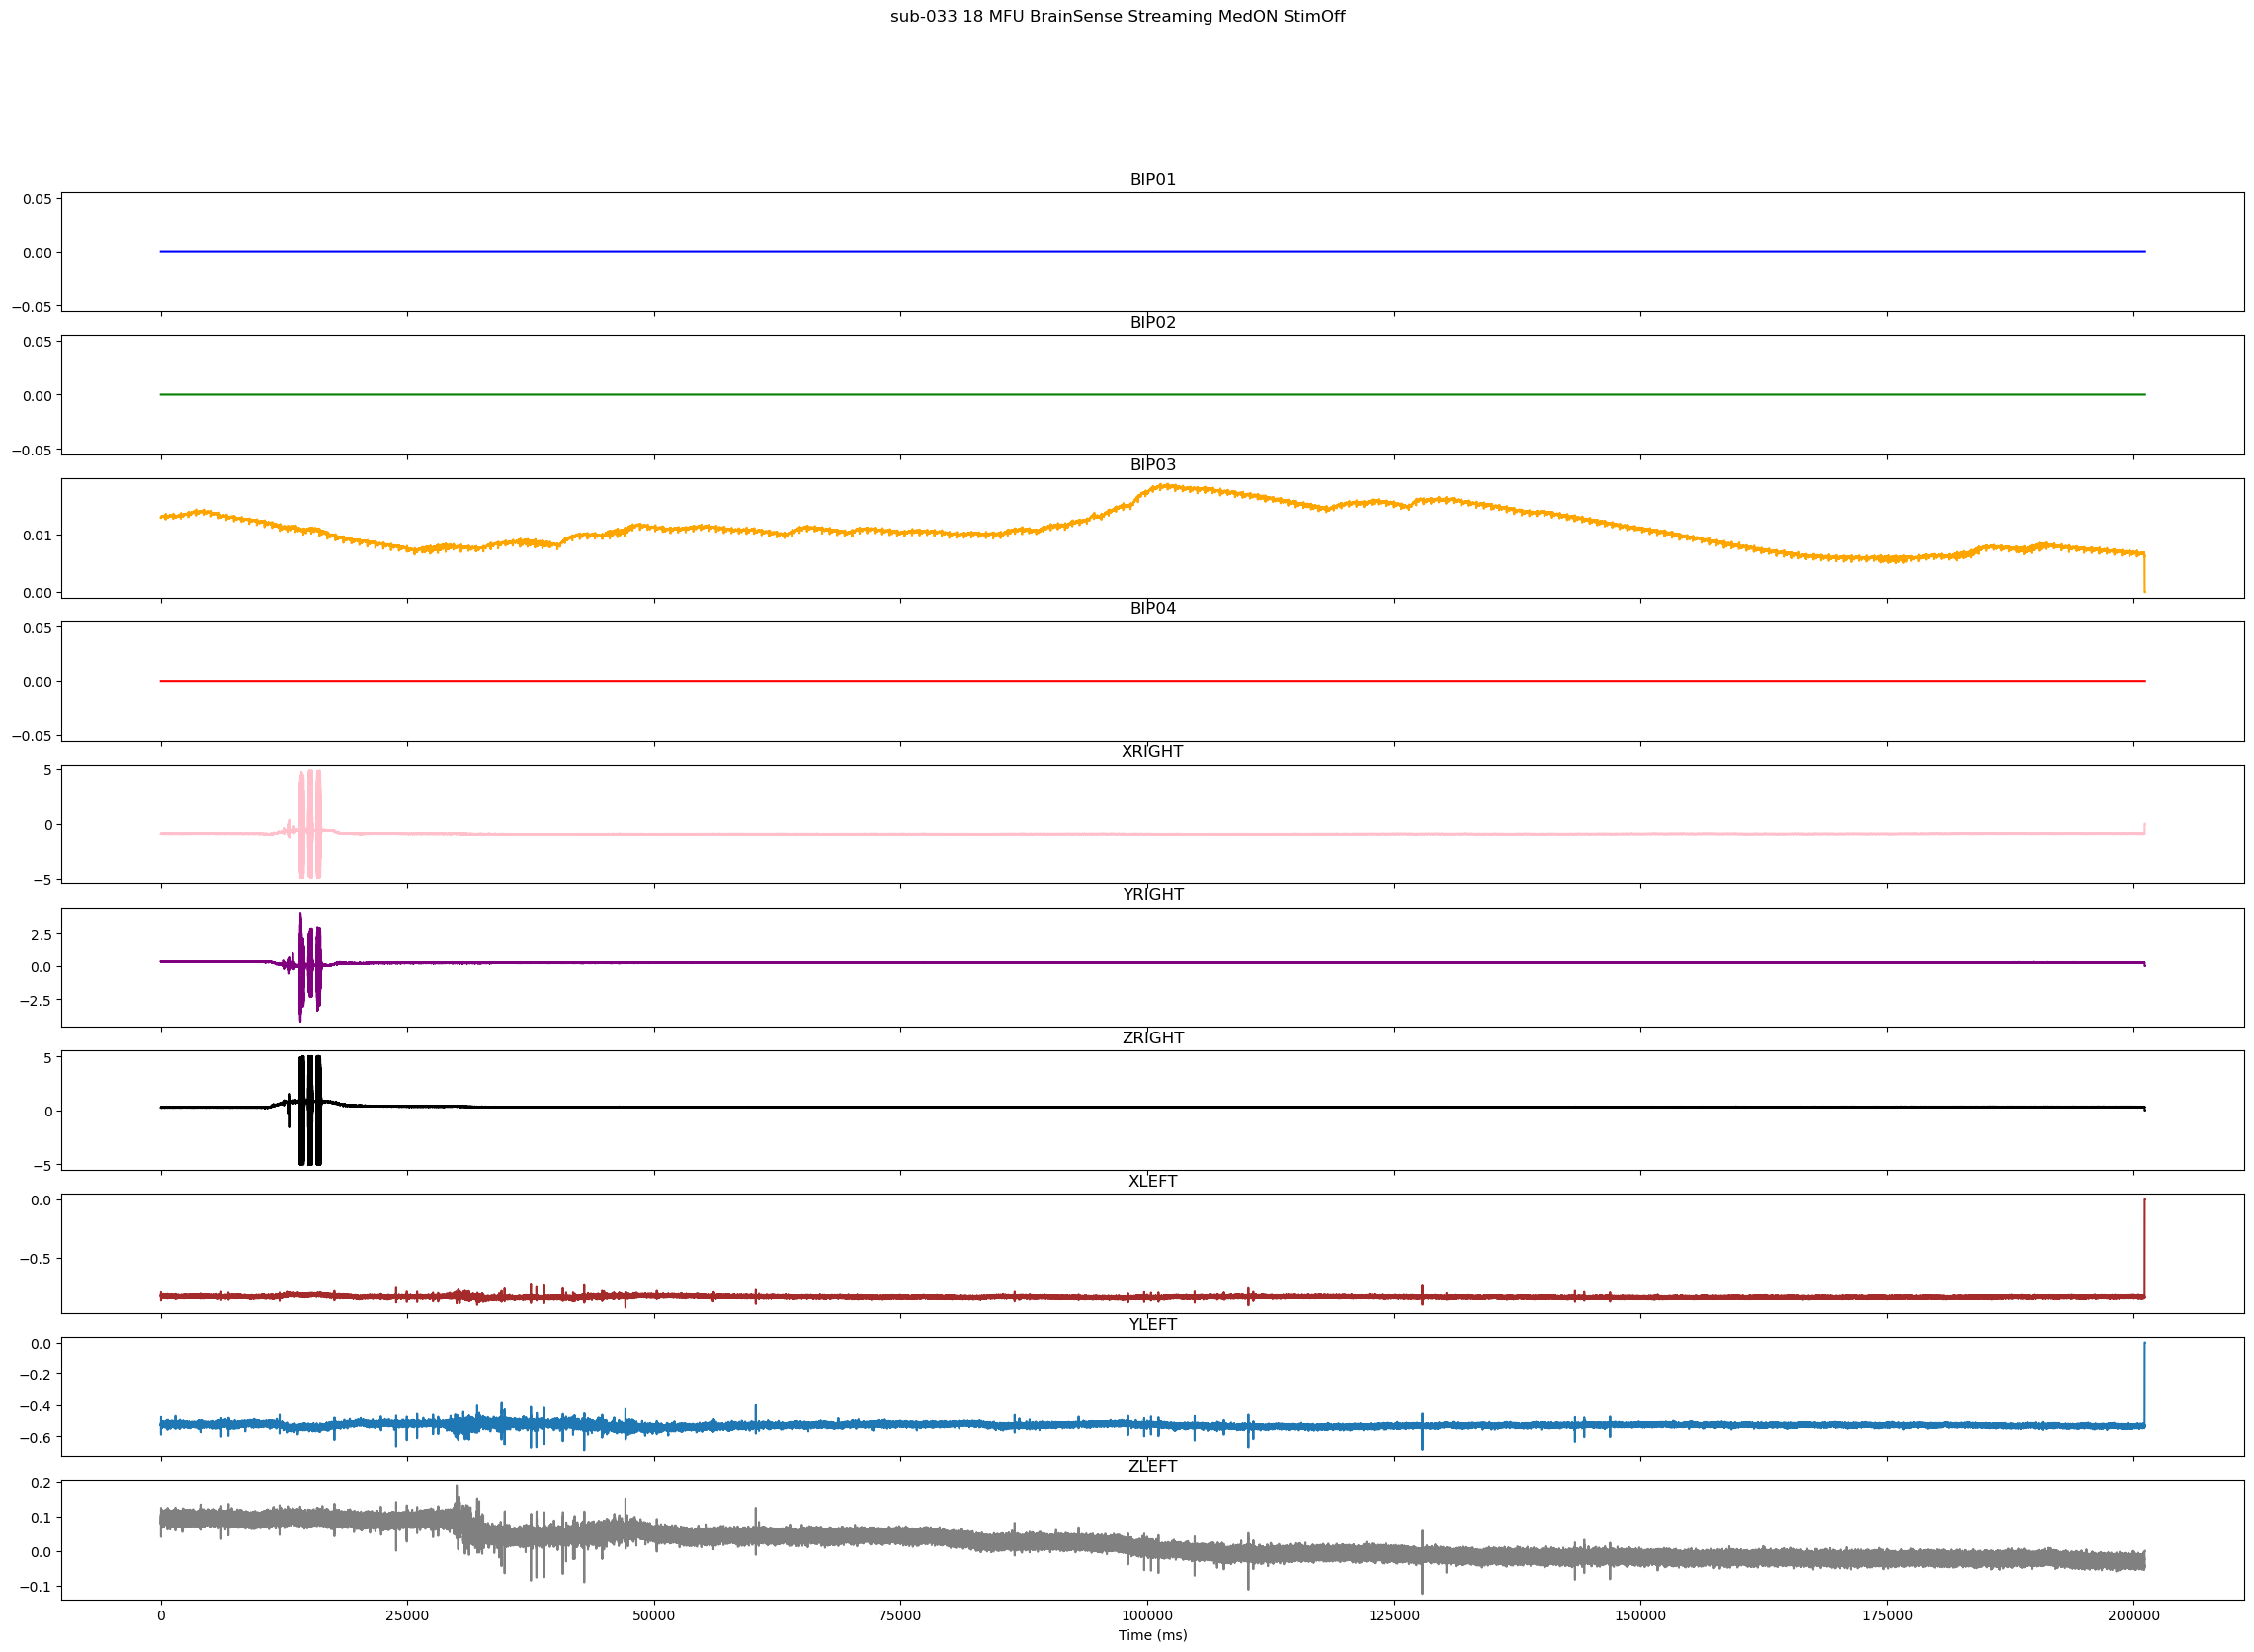

In [13]:
# OPEN THE TMSI FILE

Example_dir = dirname(realpath('C:\\Users\\Juliette\\OneDrive - Charité - Universitätsmedizin Berlin\\Documents\\MATLAB\\RawFiles\\TMSi files\\sub-033\\18MFU\\MedON\\Sub_033_18MFU_M1S0_BrStr_Rest - 20230201T144535')) # directory of this file
modules_dir = join(Example_dir, '..') # directory with all modules (I don't quite understand this line)
measurements_dir = join(Example_dir, '../measurements') # directory with all measurements (same, I don't see why we need this line)
sys.path.append(modules_dir)


TMSi_data = Poly5Reader()
# When no arguments are given, a pop-up window allows you to select the file you want to read. 
# You can also use data=Poly5Reader(full_path) to load a file. Note that the full file path is required here.

# CONVERT TO MNE

# Extract the samples and channel names from the Poly5Reader object
samples = TMSi_data.samples
ch_names = TMSi_data.ch_names

# Conversion to MNE raw array

toMNE = True
mne_object = TMSi_data.read_data_MNE()

# PLOT (ALL) CHANNELS OF THE TMSI DATA RECORDED

# Retrieve the MNE RawArray info and sample data
info_mne = mne_object.info
samples_mne = mne_object._data
    
# mne_object.plot(start = 5, duration = 5, n_channels = 2) (only if I want to plot in interactive viewer)

n_chan = len(mne_object.ch_names)
time_duration = (mne_object.n_times/mne_object.info['sfreq']).astype(float)
time_duration_ms=time_duration*1000

print(     
	f'The data object has:\n\t{mne_object.n_times} time samples,'      
	f'\n\tand a sample frequency of {mne_object.info["sfreq"]} Hz'      
	f'\n\twith a recording duration of {time_duration} seconds.'      
	f'\n\t{n_chan} channels were labeled as \n{mne_object.ch_names}.')

x_time=np.arange(0,time_duration_ms,time_duration_ms/mne_object.n_times)

BIP01 = mne_object.get_data()[0]
BIP02 = mne_object.get_data()[1]
BIP03 = mne_object.get_data()[2]
BIP04 = mne_object.get_data()[3]
XRIGHT = mne_object.get_data()[4]
YRIGHT = mne_object.get_data()[5]
ZRIGHT = mne_object.get_data()[6]
XLEFT = mne_object.get_data()[7]
YLEFT = mne_object.get_data()[8]
ZLEFT = mne_object.get_data()[9]

fig, axs = plt.subplots(10)
fig.suptitle('sub-033 18 MFU BrainSense Streaming MedON StimOff')
axs[0].plot(x_time,BIP01,color='blue')
axs[0].set_title('BIP01')
axs[1].plot(x_time,BIP02,color='green')
axs[1].set_title('BIP02')
axs[2].plot(x_time,BIP03,color='orange')
axs[2].set_title('BIP03')
axs[3].plot(x_time,BIP04,color='red')
axs[3].set_title('BIP04')
axs[4].plot(x_time,XRIGHT,color='pink')
axs[4].set_title('XRIGHT')
axs[5].plot(x_time,YRIGHT,color='purple')
axs[5].set_title('YRIGHT')
axs[6].plot(x_time,ZRIGHT,color='black')
axs[6].set_title('ZRIGHT')
axs[7].plot(x_time,XLEFT,color='brown')
axs[7].set_title('XLEFT')
axs[8].plot(x_time,YLEFT)
axs[8].set_title('YLEFT')
axs[9].plot(x_time,ZLEFT,color='grey')
axs[9].set_title('ZLEFT')
axs[9].set_xlabel('Time (ms)')
for ax in axs.flat:
    ax.label_outer()
fig.set_size_inches(28.5, 18.5)	


In [14]:
mne_object.plot(start = 5, duration = 5, n_channels = 2)

# artefacts in BIP03 only (ECG channel)

Channels marked as bad:
none


Condition: Sub-033 18MFU MedOn Stim Off Indefinite Streaming:

Reading file  C:/Users/Juliette/OneDrive - Charité - Universitätsmedizin Berlin/Documents/MATLAB/RawFiles/TMSi files/sub-033/18MFU/MedON/Sub_033_18MFU_M1S0_IndStr - 20230201T143726/Sub_033_18MFU_M1S0_IndStr-20230201T143726.DATA.Poly5
	 Number of samples:  1293754 
	 Number of channels:  12 
	 Sample rate: 4096 Hz
Done reading data.
Creating RawArray with float64 data, n_channels=12, n_times=1293754
    Range : 0 ... 1293753 =      0.000 ...   315.858 secs
Ready.
The data object has:
	1293754 time samples,
	and a sample frequency of 4096.0 Hz
	with a recording duration of 315.85791015625 seconds.
	12 channels were labeled as 
['BIP 01', 'BIP 02', 'BIP 03', 'BIP 04', 'X-0', 'Y-0', 'Z-0', 'X-1', 'Y-1', 'Z-1', 'STATUS', 'Counter 2power24'].


c:\Users\Juliette\OneDrive\Documents\Code\tmsi-python-interface-main\TMSiFileFormats\file_readers\poly5reader.py:92: RuntimeWarning: Channel names are not unique, found duplicates for: {'X', 'Z', 'Y'}. Applying running numbers for duplicates.
  info = mne.create_info(ch_names=labels, sfreq=fs, ch_types=types_clean)


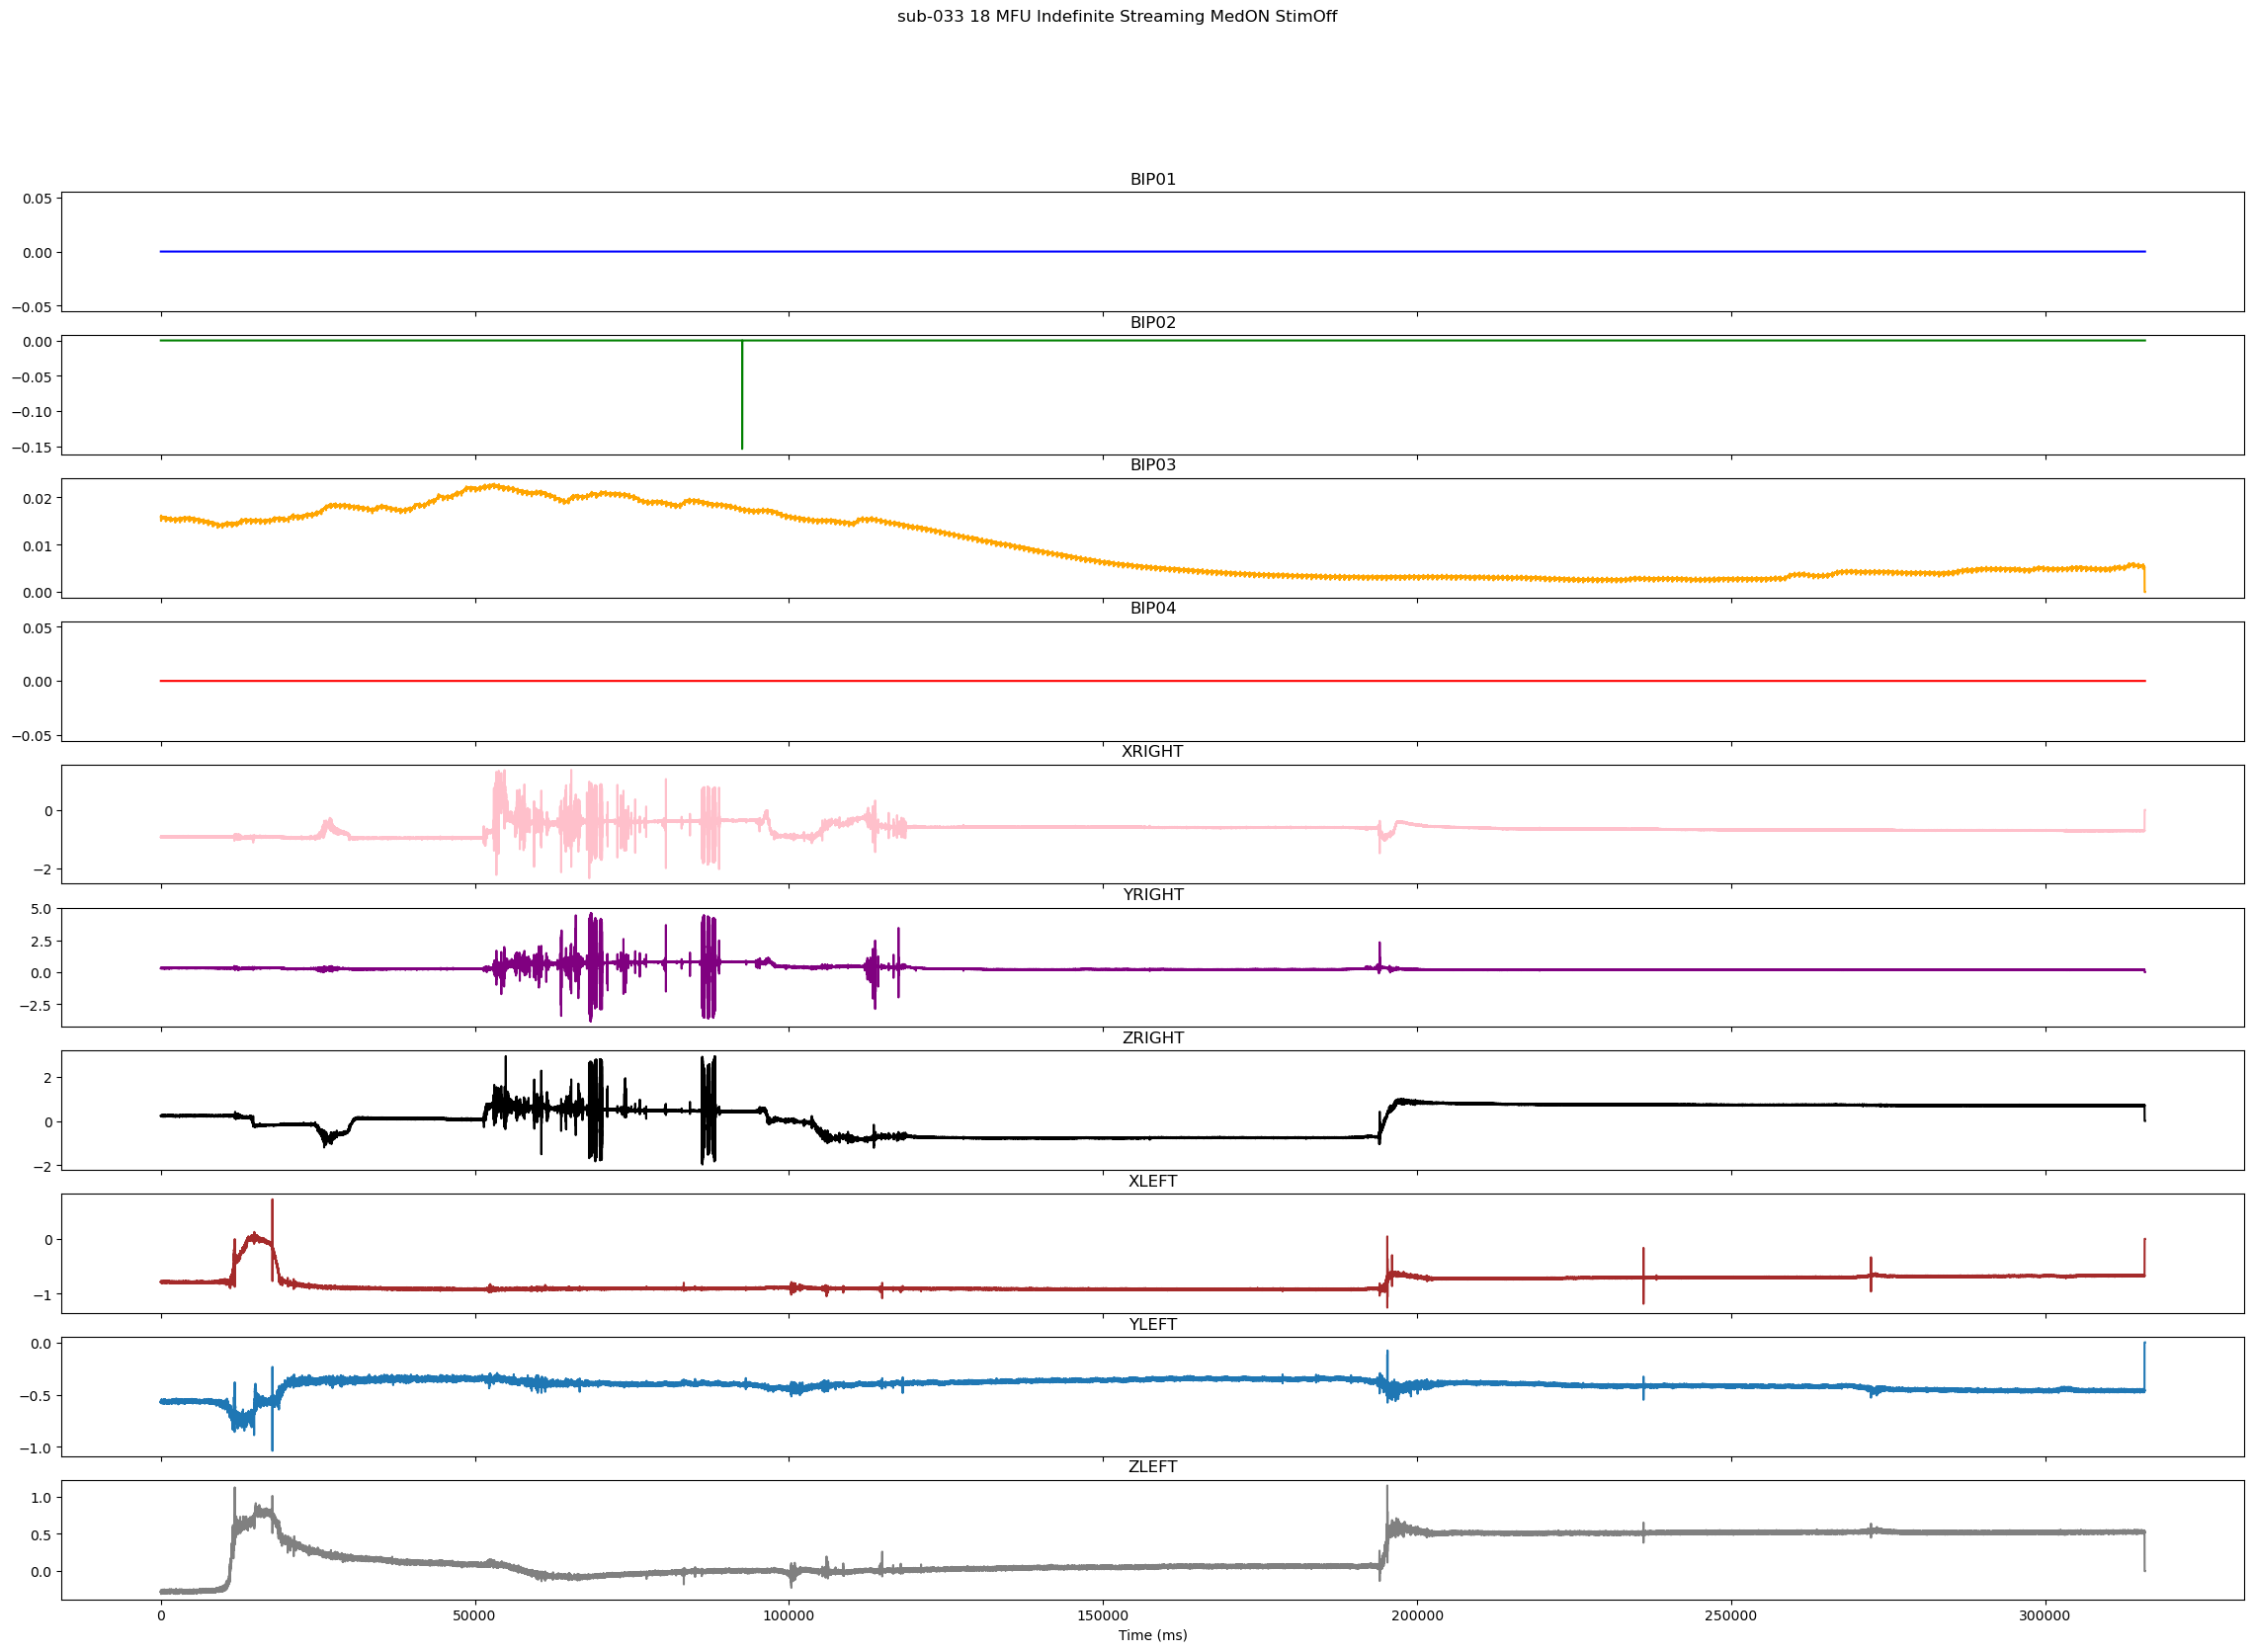

In [19]:
Example_dir = dirname(realpath('C:\\Users\\Juliette\\OneDrive - Charité - Universitätsmedizin Berlin\\Documents\\MATLAB\\RawFiles\\TMSi files\\sub-033\\18MFU\\MedON\\Sub_033_18MFU_M1S0_BrStr_Rest - 20230201T144535')) # directory of this file
modules_dir = join(Example_dir, '..') # directory with all modules (I don't quite understand this line)
measurements_dir = join(Example_dir, '../measurements') # directory with all measurements (same, I don't see why we need this line)
sys.path.append(modules_dir)


TMSi_data = Poly5Reader()

# Extract the samples and channel names from the Poly5Reader object
samples = TMSi_data.samples
ch_names = TMSi_data.ch_names

# Conversion to MNE raw array

toMNE = True
mne_object = TMSi_data.read_data_MNE()

# Retrieve the MNE RawArray info and sample data
info_mne = mne_object.info
samples_mne = mne_object._data
    
# mne_object.plot(start = 5, duration = 5, n_channels = 2) (only if I want to plot in interactive viewer)

n_chan = len(mne_object.ch_names)
time_duration = (mne_object.n_times/mne_object.info['sfreq']).astype(float)
time_duration_ms=time_duration*1000

print(     
	f'The data object has:\n\t{mne_object.n_times} time samples,'      
	f'\n\tand a sample frequency of {mne_object.info["sfreq"]} Hz'      
	f'\n\twith a recording duration of {time_duration} seconds.'      
	f'\n\t{n_chan} channels were labeled as \n{mne_object.ch_names}.')

x_time=np.arange(0,time_duration_ms,time_duration_ms/mne_object.n_times)

BIP01 = mne_object.get_data()[0]
BIP02 = mne_object.get_data()[1]
BIP03 = mne_object.get_data()[2]
BIP04 = mne_object.get_data()[3]
XRIGHT = mne_object.get_data()[4]
YRIGHT = mne_object.get_data()[5]
ZRIGHT = mne_object.get_data()[6]
XLEFT = mne_object.get_data()[7]
YLEFT = mne_object.get_data()[8]
ZLEFT = mne_object.get_data()[9]

fig, axs = plt.subplots(10)
fig.suptitle('sub-033 18 MFU Indefinite Streaming MedON StimOff')
axs[0].plot(x_time,BIP01,color='blue')
axs[0].set_title('BIP01')
axs[1].plot(x_time,BIP02,color='green')
axs[1].set_title('BIP02')
axs[2].plot(x_time,BIP03,color='orange')
axs[2].set_title('BIP03')
axs[3].plot(x_time,BIP04,color='red')
axs[3].set_title('BIP04')
axs[4].plot(x_time,XRIGHT,color='pink')
axs[4].set_title('XRIGHT')
axs[5].plot(x_time,YRIGHT,color='purple')
axs[5].set_title('YRIGHT')
axs[6].plot(x_time,ZRIGHT,color='black')
axs[6].set_title('ZRIGHT')
axs[7].plot(x_time,XLEFT,color='brown')
axs[7].set_title('XLEFT')
axs[8].plot(x_time,YLEFT)
axs[8].set_title('YLEFT')
axs[9].plot(x_time,ZLEFT,color='grey')
axs[9].set_title('ZLEFT')
axs[9].set_xlabel('Time (ms)')
for ax in axs.flat:
    ax.label_outer()
fig.set_size_inches(28.5, 18.5)	

In [20]:
mne_object.plot(start = 5, duration = 5, n_channels = 2)

# Artefacts are not seen in BIP channels, sync device artefact is picked up in accelerometer channel, but they are not very accurate

Channels marked as bad:
none


Condition: Sub-033 18MFU MedOff Stim Off Streaming Rest/Sync:

Reading file  C:/Users/Juliette/OneDrive - Charité - Universitätsmedizin Berlin/Documents/MATLAB/RawFiles/TMSi files/sub-033/18MFU/MedOFF/Sub_033_18MFU_M0S0_BrStr_Rest - 20230201T102139/Sub_033_18MFU_M0S0_BrStr_Rest-20230201T102139.DATA.Poly5
	 Number of samples:  851760 
	 Number of channels:  13 
	 Sample rate: 4096 Hz
Done reading data.
Creating RawArray with float64 data, n_channels=13, n_times=851760
    Range : 0 ... 851759 =      0.000 ...   207.949 secs
Ready.


c:\Users\Juliette\OneDrive\Documents\Code\tmsi-python-interface-main\TMSiFileFormats\file_readers\poly5reader.py:92: RuntimeWarning: Channel names are not unique, found duplicates for: {'X', 'Z', 'Y'}. Applying running numbers for duplicates.
  info = mne.create_info(ch_names=labels, sfreq=fs, ch_types=types_clean)


The data object has:
	851760 time samples,
	and a sample frequency of 4096.0 Hz
	with a recording duration of 207.94921875 seconds.
	13 channels were labeled as 
['EEGFzTM', 'BIP 01', 'BIP 02', 'BIP 03', 'BIP 04', 'X-0', 'Y-0', 'Z-0', 'X-1', 'Y-1', 'Z-1', 'STATUS', 'Counter 2power24'].


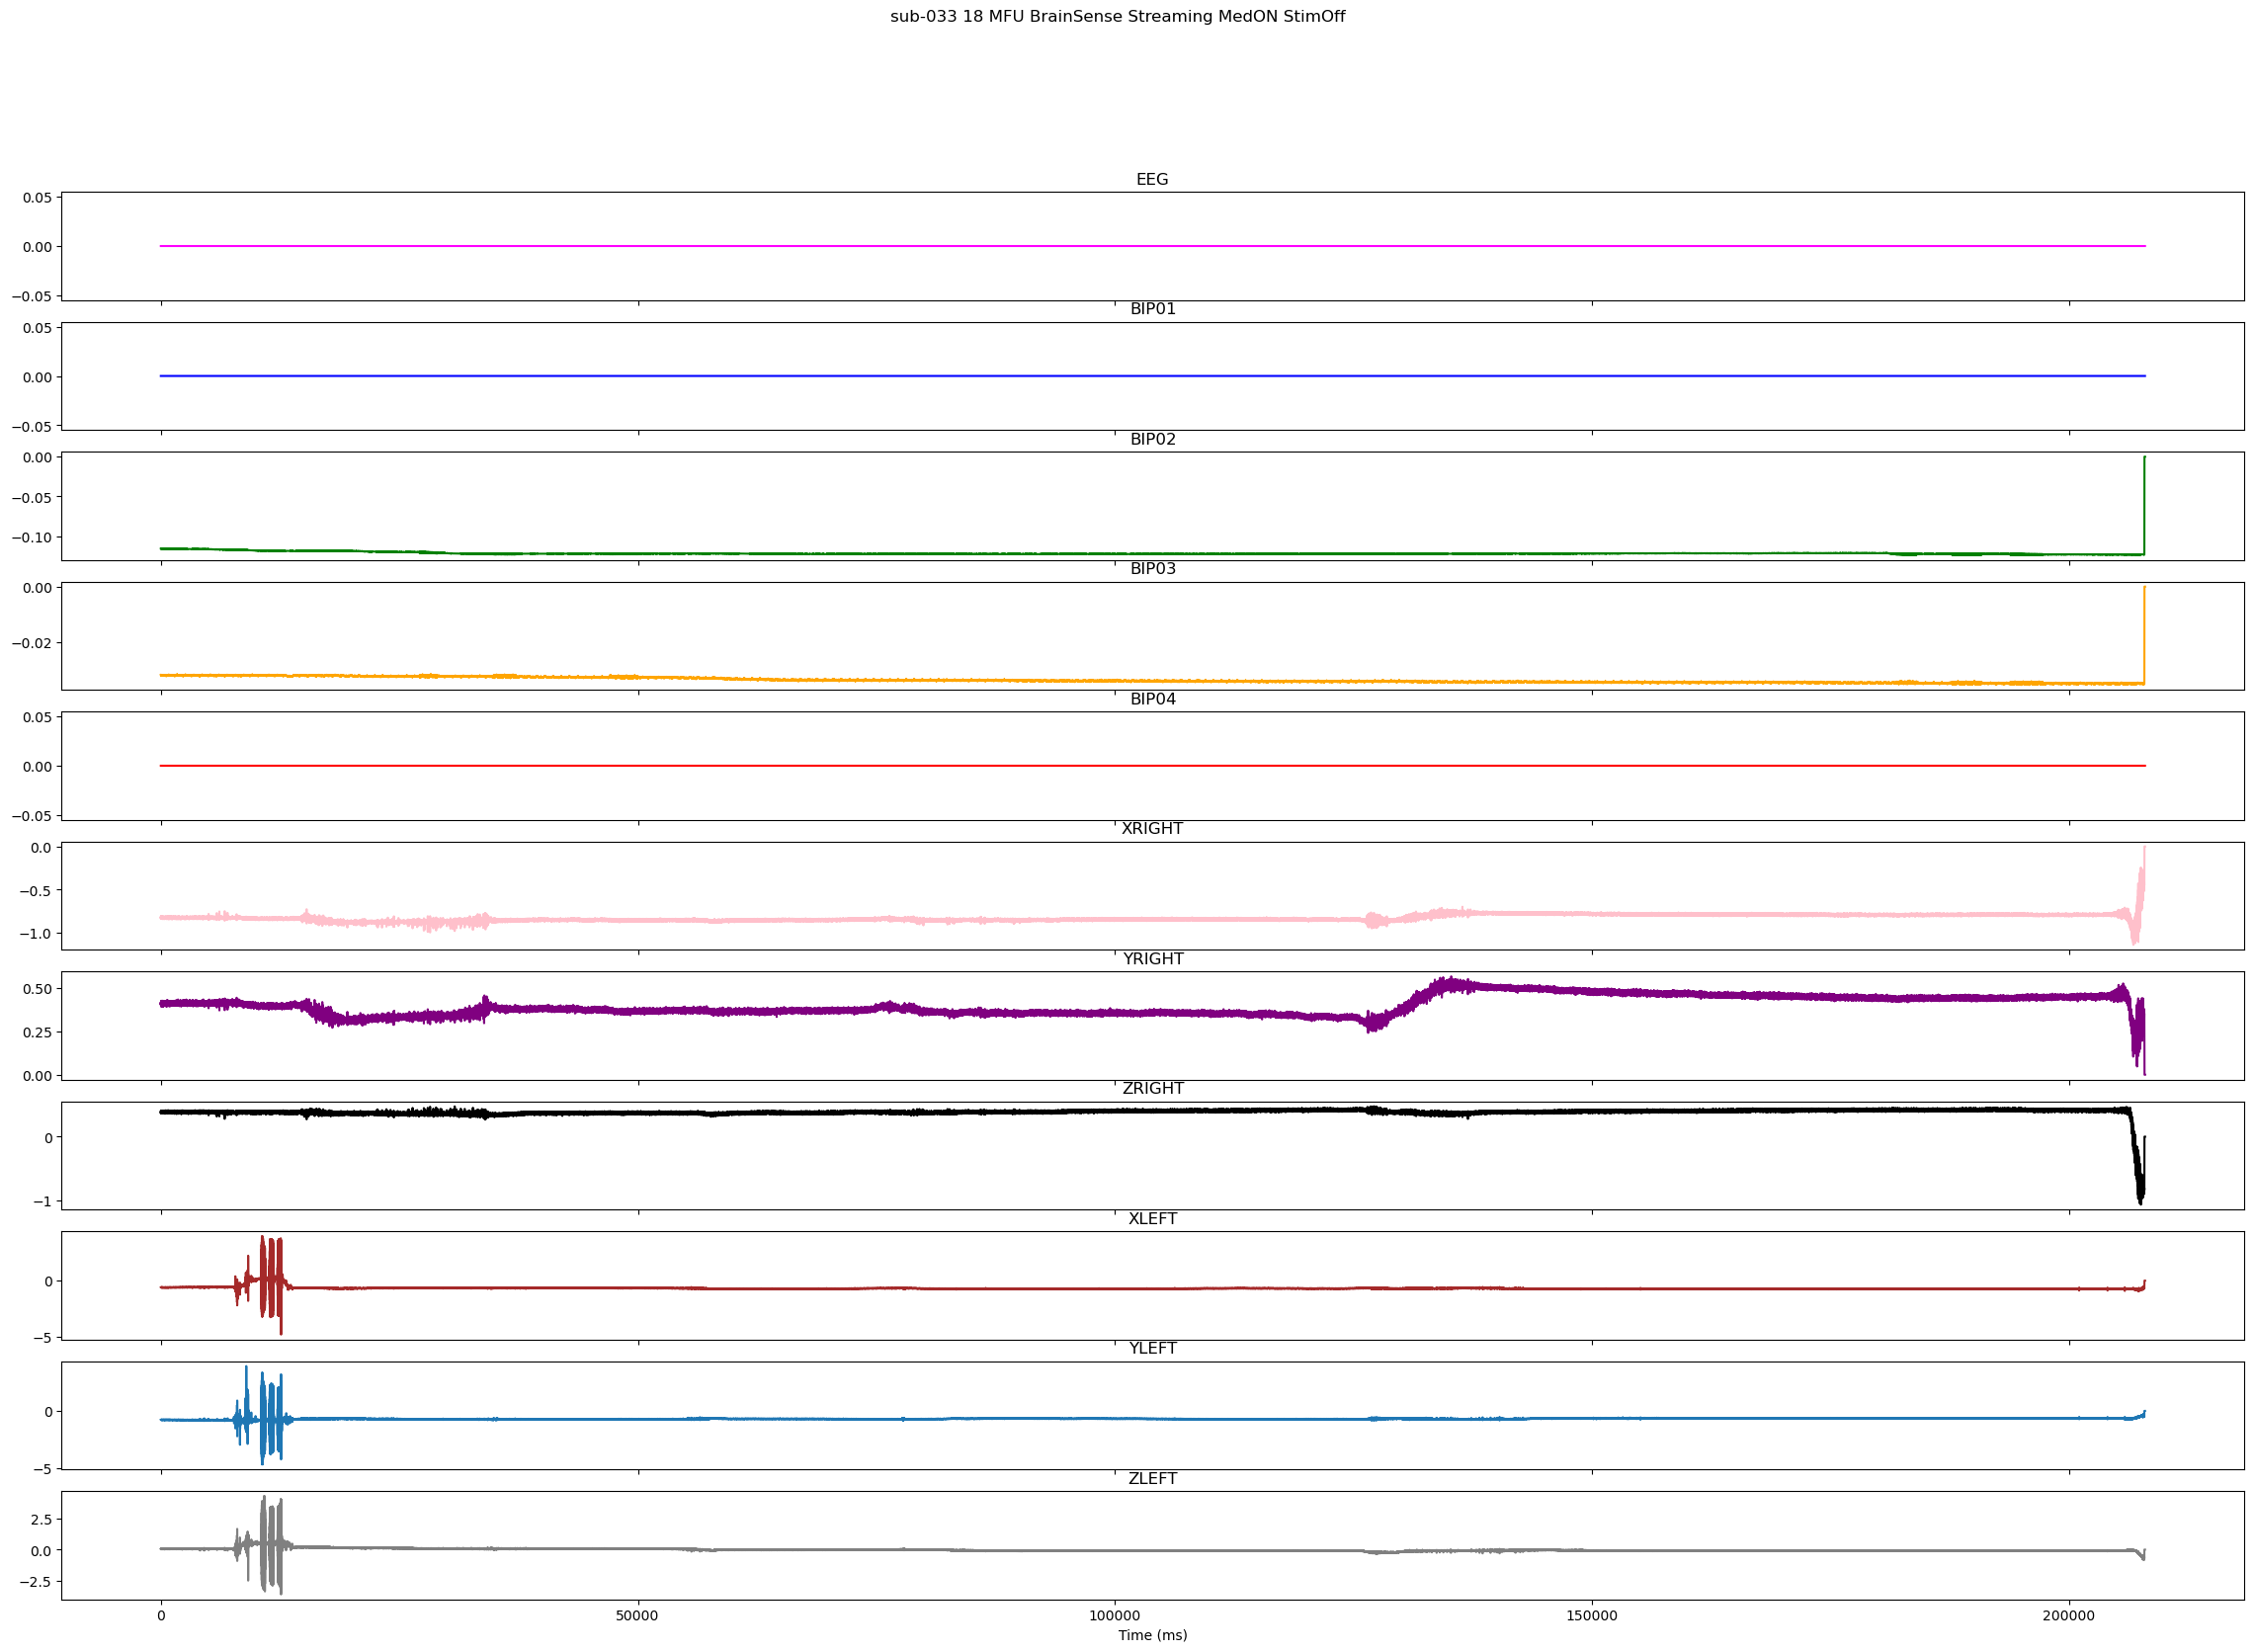

In [21]:
Example_dir = dirname(realpath('C:\\Users\\Juliette\\OneDrive - Charité - Universitätsmedizin Berlin\\Documents\\MATLAB\\RawFiles\\TMSi files\\sub-033\\18MFU\\MedON\\Sub_033_18MFU_M1S0_BrStr_Rest - 20230201T144535')) # directory of this file
modules_dir = join(Example_dir, '..') # directory with all modules (I don't quite understand this line)
measurements_dir = join(Example_dir, '../measurements') # directory with all measurements (same, I don't see why we need this line)
sys.path.append(modules_dir)


TMSi_data = Poly5Reader()

# Extract the samples and channel names from the Poly5Reader object
samples = TMSi_data.samples
ch_names = TMSi_data.ch_names

# Conversion to MNE raw array

toMNE = True
mne_object = TMSi_data.read_data_MNE()

# Retrieve the MNE RawArray info and sample data
info_mne = mne_object.info
samples_mne = mne_object._data
    
# mne_object.plot(start = 5, duration = 5, n_channels = 2) (only if I want to plot in interactive viewer)

n_chan = len(mne_object.ch_names)
time_duration = (mne_object.n_times/mne_object.info['sfreq']).astype(float)
time_duration_ms=time_duration*1000

print(     
	f'The data object has:\n\t{mne_object.n_times} time samples,'      
	f'\n\tand a sample frequency of {mne_object.info["sfreq"]} Hz'      
	f'\n\twith a recording duration of {time_duration} seconds.'      
	f'\n\t{n_chan} channels were labeled as \n{mne_object.ch_names}.')

x_time=np.arange(0,time_duration_ms,time_duration_ms/mne_object.n_times)

EEG = mne_object.get_data()[0]
BIP01 = mne_object.get_data()[1]
BIP02 = mne_object.get_data()[2]
BIP03 = mne_object.get_data()[3]
BIP04 = mne_object.get_data()[4]
XRIGHT = mne_object.get_data()[5]
YRIGHT = mne_object.get_data()[6]
ZRIGHT = mne_object.get_data()[7]
XLEFT = mne_object.get_data()[8]
YLEFT = mne_object.get_data()[9]
ZLEFT = mne_object.get_data()[10]

fig, axs = plt.subplots(11)
fig.suptitle('sub-033 18 MFU BrainSense Streaming MedON StimOff')
axs[0].plot(x_time,EEG,color='magenta')
axs[0].set_title('EEG')
axs[1].plot(x_time,BIP01,color='blue')
axs[1].set_title('BIP01')
axs[2].plot(x_time,BIP02,color='green')
axs[2].set_title('BIP02')
axs[3].plot(x_time,BIP03,color='orange')
axs[3].set_title('BIP03')
axs[4].plot(x_time,BIP04,color='red')
axs[4].set_title('BIP04')
axs[5].plot(x_time,XRIGHT,color='pink')
axs[5].set_title('XRIGHT')
axs[6].plot(x_time,YRIGHT,color='purple')
axs[6].set_title('YRIGHT')
axs[7].plot(x_time,ZRIGHT,color='black')
axs[7].set_title('ZRIGHT')
axs[8].plot(x_time,XLEFT,color='brown')
axs[8].set_title('XLEFT')
axs[9].plot(x_time,YLEFT)
axs[9].set_title('YLEFT')
axs[10].plot(x_time,ZLEFT,color='grey')
axs[10].set_title('ZLEFT')
axs[10].set_xlabel('Time (ms)')
for ax in axs.flat:
    ax.label_outer()
fig.set_size_inches(28.5, 18.5)	

In [22]:
mne_object.plot(start = 5, duration = 5, n_channels = 2)

# Stim artefacts have been picked up in BIP02 (bipolar electrode around the IPG) and in BIP03 (ECG near the heart)


Channels marked as bad:
none


Condition: Sub-033 18MFU MedOff Stim Off Indefinite Streaming:

Reading file  C:/Users/Juliette/OneDrive - Charité - Universitätsmedizin Berlin/Documents/MATLAB/RawFiles/TMSi files/sub-033/18MFU/MedOFF/Sub_033_18MFU_M0S0_IndfStr - 20230201T101232/Sub_033_18MFU_M0S0_IndfStr-20230201T101232.DATA.Poly5
	 Number of samples:  1122345 
	 Number of channels:  13 
	 Sample rate: 4096 Hz
Done reading data.
Creating RawArray with float64 data, n_channels=13, n_times=1122345
    Range : 0 ... 1122344 =      0.000 ...   274.010 secs
Ready.


c:\Users\Juliette\OneDrive\Documents\Code\tmsi-python-interface-main\TMSiFileFormats\file_readers\poly5reader.py:92: RuntimeWarning: Channel names are not unique, found duplicates for: {'X', 'Z', 'Y'}. Applying running numbers for duplicates.
  info = mne.create_info(ch_names=labels, sfreq=fs, ch_types=types_clean)


The data object has:
	1122345 time samples,
	and a sample frequency of 4096.0 Hz
	with a recording duration of 274.010009765625 seconds.
	13 channels were labeled as 
['EEGFzTM', 'BIP 01', 'BIP 02', 'BIP 03', 'BIP 04', 'X-0', 'Y-0', 'Z-0', 'X-1', 'Y-1', 'Z-1', 'STATUS', 'Counter 2power24'].


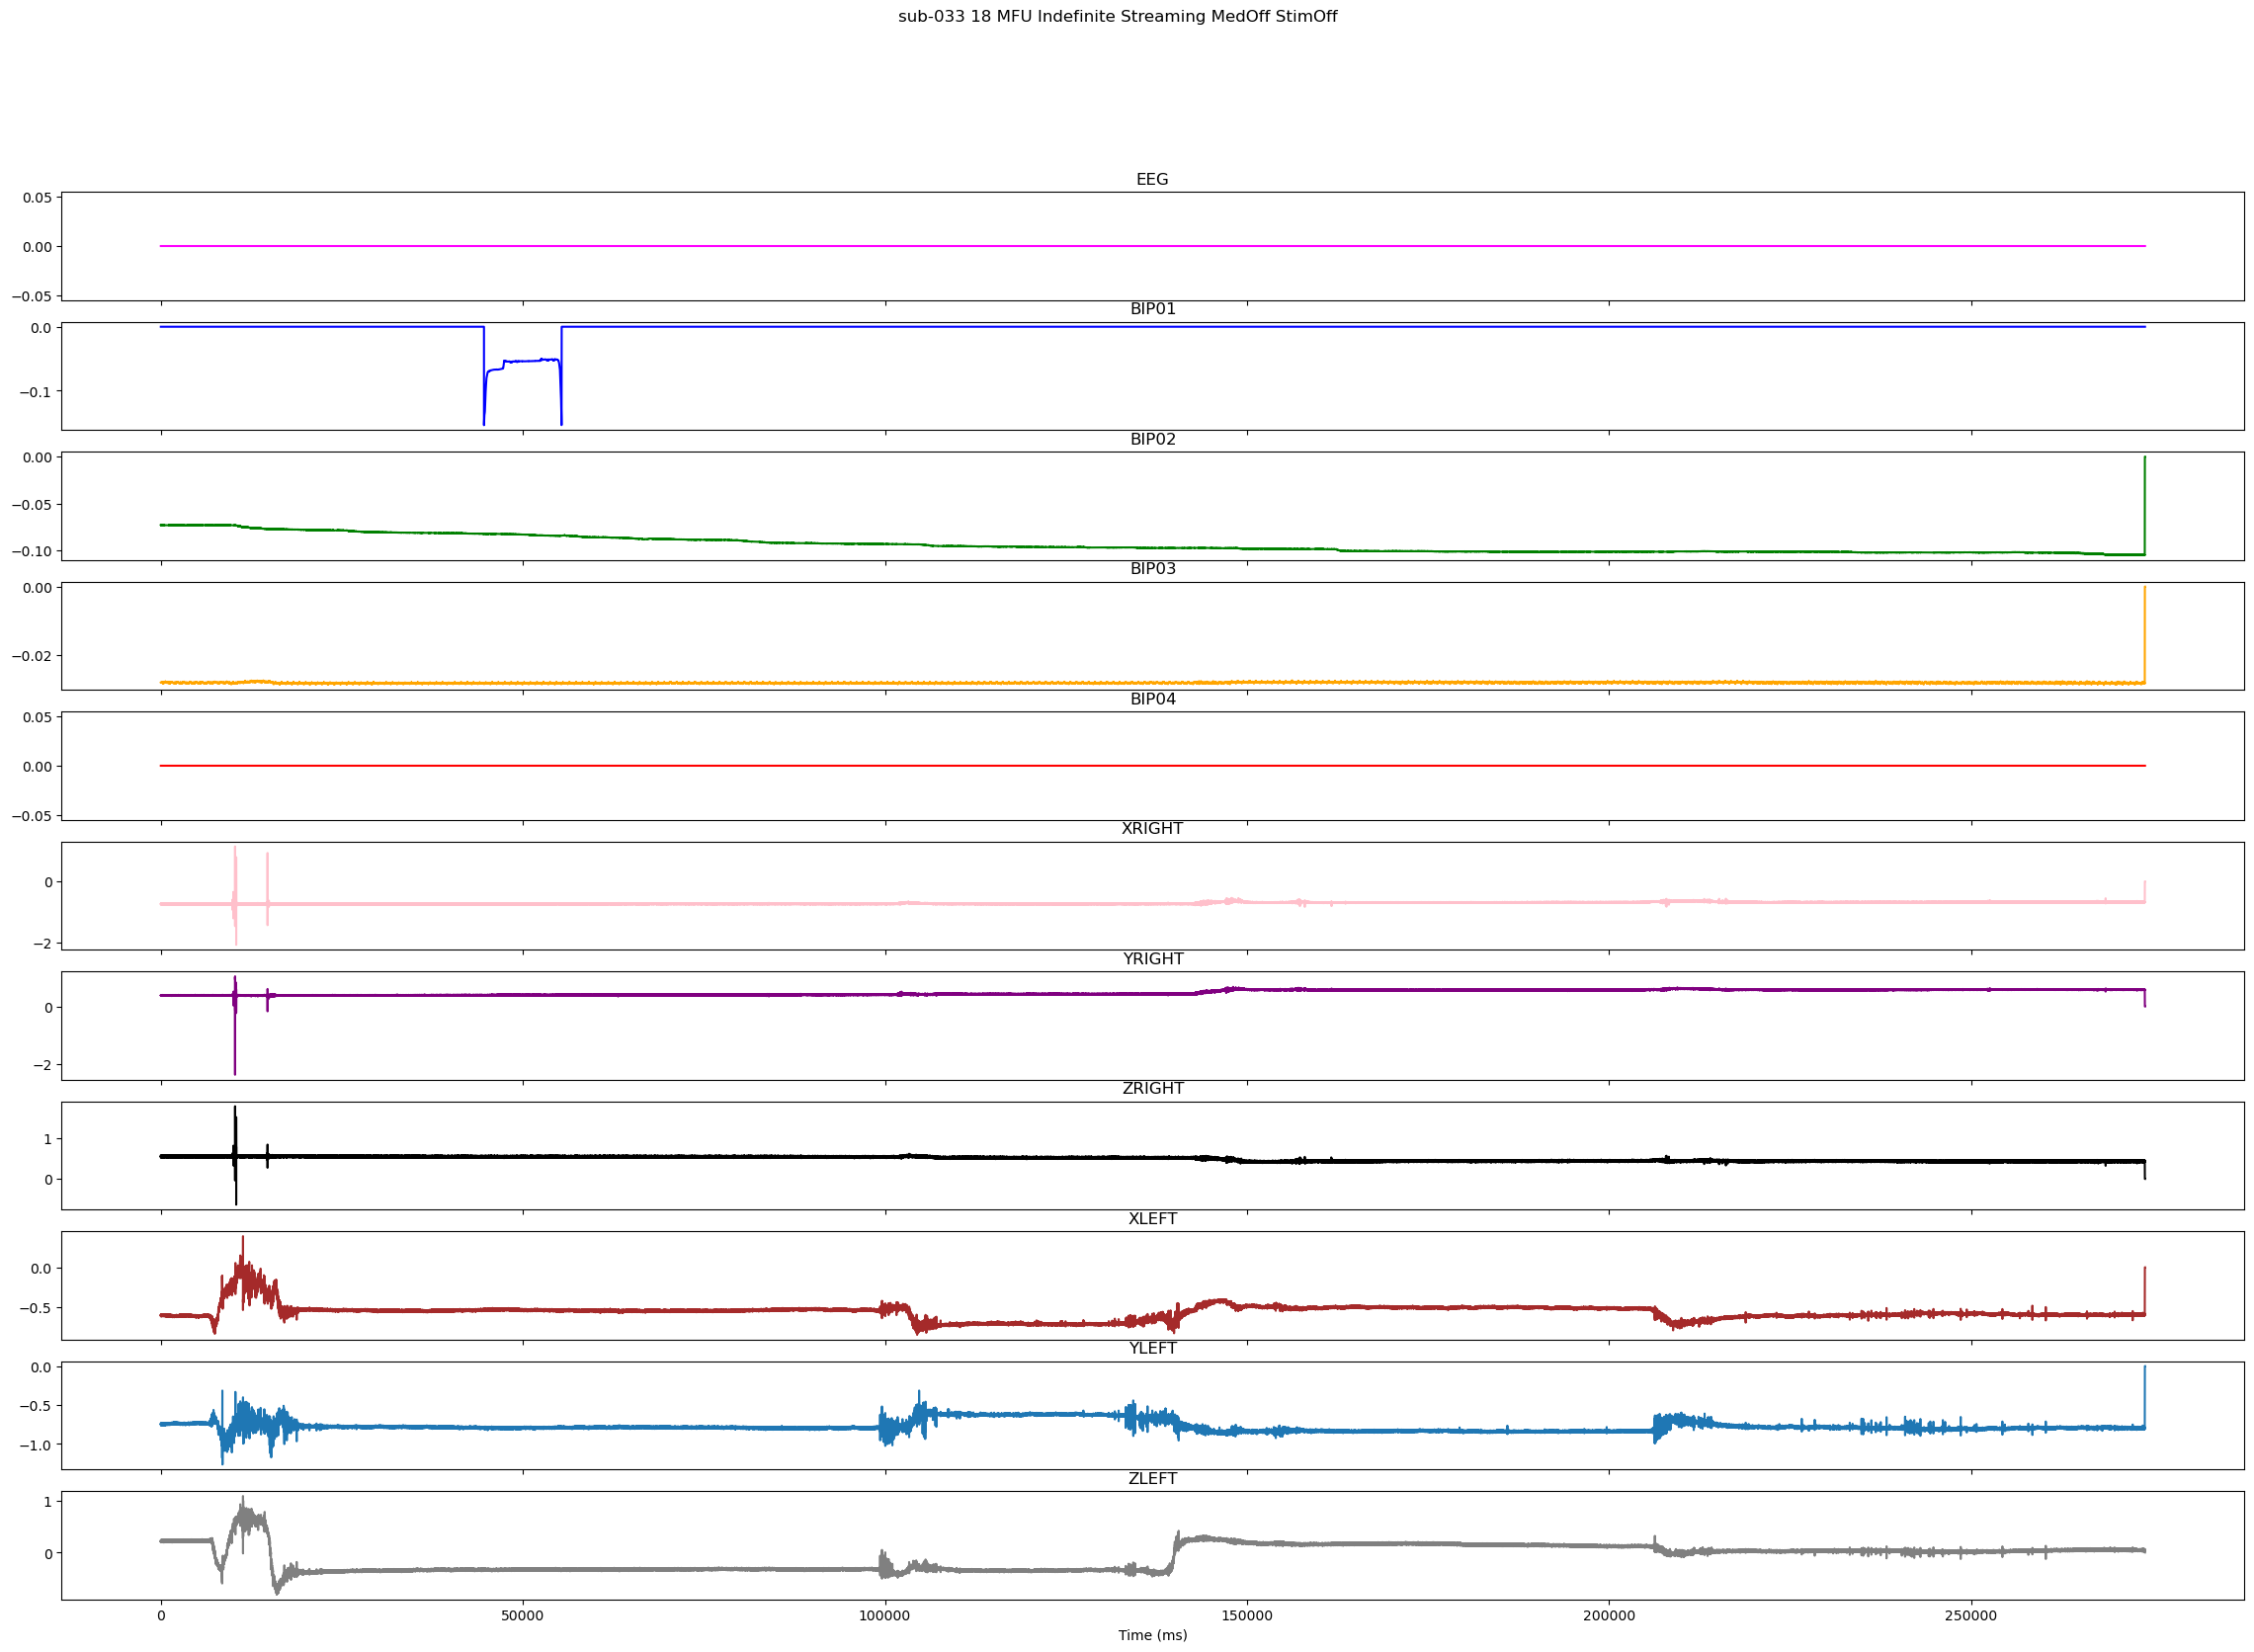

In [23]:
Example_dir = dirname(realpath('C:\\Users\\Juliette\\OneDrive - Charité - Universitätsmedizin Berlin\\Documents\\MATLAB\\RawFiles\\TMSi files\\sub-033\\18MFU\\MedON\\Sub_033_18MFU_M1S0_BrStr_Rest - 20230201T144535')) # directory of this file
modules_dir = join(Example_dir, '..') # directory with all modules (I don't quite understand this line)
measurements_dir = join(Example_dir, '../measurements') # directory with all measurements (same, I don't see why we need this line)
sys.path.append(modules_dir)


TMSi_data = Poly5Reader()

# Extract the samples and channel names from the Poly5Reader object
samples = TMSi_data.samples
ch_names = TMSi_data.ch_names

# Conversion to MNE raw array

toMNE = True
mne_object = TMSi_data.read_data_MNE()

# Retrieve the MNE RawArray info and sample data
info_mne = mne_object.info
samples_mne = mne_object._data
    
# mne_object.plot(start = 5, duration = 5, n_channels = 2) (only if I want to plot in interactive viewer)

n_chan = len(mne_object.ch_names)
time_duration = (mne_object.n_times/mne_object.info['sfreq']).astype(float)
time_duration_ms=time_duration*1000

print(     
	f'The data object has:\n\t{mne_object.n_times} time samples,'      
	f'\n\tand a sample frequency of {mne_object.info["sfreq"]} Hz'      
	f'\n\twith a recording duration of {time_duration} seconds.'      
	f'\n\t{n_chan} channels were labeled as \n{mne_object.ch_names}.')

x_time=np.arange(0,time_duration_ms,time_duration_ms/mne_object.n_times)

EEG = mne_object.get_data()[0]
BIP01 = mne_object.get_data()[1]
BIP02 = mne_object.get_data()[2]
BIP03 = mne_object.get_data()[3]
BIP04 = mne_object.get_data()[4]
XRIGHT = mne_object.get_data()[5]
YRIGHT = mne_object.get_data()[6]
ZRIGHT = mne_object.get_data()[7]
XLEFT = mne_object.get_data()[8]
YLEFT = mne_object.get_data()[9]
ZLEFT = mne_object.get_data()[10]

fig, axs = plt.subplots(11)
fig.suptitle('sub-033 18 MFU Indefinite Streaming MedOff StimOff')
axs[0].plot(x_time,EEG,color='magenta')
axs[0].set_title('EEG')
axs[1].plot(x_time,BIP01,color='blue')
axs[1].set_title('BIP01')
axs[2].plot(x_time,BIP02,color='green')
axs[2].set_title('BIP02')
axs[3].plot(x_time,BIP03,color='orange')
axs[3].set_title('BIP03')
axs[4].plot(x_time,BIP04,color='red')
axs[4].set_title('BIP04')
axs[5].plot(x_time,XRIGHT,color='pink')
axs[5].set_title('XRIGHT')
axs[6].plot(x_time,YRIGHT,color='purple')
axs[6].set_title('YRIGHT')
axs[7].plot(x_time,ZRIGHT,color='black')
axs[7].set_title('ZRIGHT')
axs[8].plot(x_time,XLEFT,color='brown')
axs[8].set_title('XLEFT')
axs[9].plot(x_time,YLEFT)
axs[9].set_title('YLEFT')
axs[10].plot(x_time,ZLEFT,color='grey')
axs[10].set_title('ZLEFT')
axs[10].set_xlabel('Time (ms)')
for ax in axs.flat:
    ax.label_outer()
fig.set_size_inches(28.5, 18.5)	

In [24]:
mne_object.plot(start = 5, duration = 5, n_channels = 2)

# Sync device artefacts are seen very slighly in BIP01 but that’s it (we don’t see the taps however) and the sync device was use only on finger, not placed on the IPG


Channels marked as bad:
['BIP 02']


**Sub-036 (with Barbara):**

Condition: Sub-036 12MFU MedOn Stim Off Streaming Rest/Sync:

Reading file  C:/Users/Juliette/OneDrive - Charité - Universitätsmedizin Berlin/Documents/MATLAB/RawFiles/TMSi files/sub-036/12MFU/MedON/Sub036_12mfu_M1S0_BStr_Rest__ - 20230201T133415/Sub036_12mfu_M1S0_BStr_Rest__-20230201T133415.DATA.Poly5
	 Number of samples:  1039068 
	 Number of channels:  50 
	 Sample rate: 4096 Hz
Done reading data.
Creating RawArray with float64 data, n_channels=50, n_times=1039068
    Range : 0 ... 1039067 =      0.000 ...   253.678 secs
Ready.


c:\Users\Juliette\OneDrive\Documents\Code\tmsi-python-interface-main\TMSiFileFormats\file_readers\poly5reader.py:92: RuntimeWarning: Channel names are not unique, found duplicates for: {'X', 'Z', 'Y'}. Applying running numbers for duplicates.
  info = mne.create_info(ch_names=labels, sfreq=fs, ch_types=types_clean)


The data object has:
	1039068 time samples,
	and a sample frequency of 4096.0 Hz
	with a recording duration of 253.6787109375 seconds.
	50 channels were labeled as 
['STNR01MT', 'STNR02MT', 'STNR03MT', 'STNR04MT', 'STNR05MT', 'STNR06MT', 'STNR07MT', 'STNR08MT', 'STNL01MT', 'STNL02MT', 'F5', 'F1', 'F2', 'F6', 'FC3', 'FCz', 'FC4', 'C5', 'C1', 'C2', 'C6', 'CP3', 'CPz', 'CP4', 'P5', 'P1', 'P2', 'P6', 'PO5', 'PO3', 'PO4', 'PO6', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'BIP 01', 'BIP 02', 'BIP 03', 'BIP 04', 'X-0', 'Y-0', 'Z-0', 'X-1', 'Y-1', 'Z-1', 'STATUS', 'Counter 2power24'].


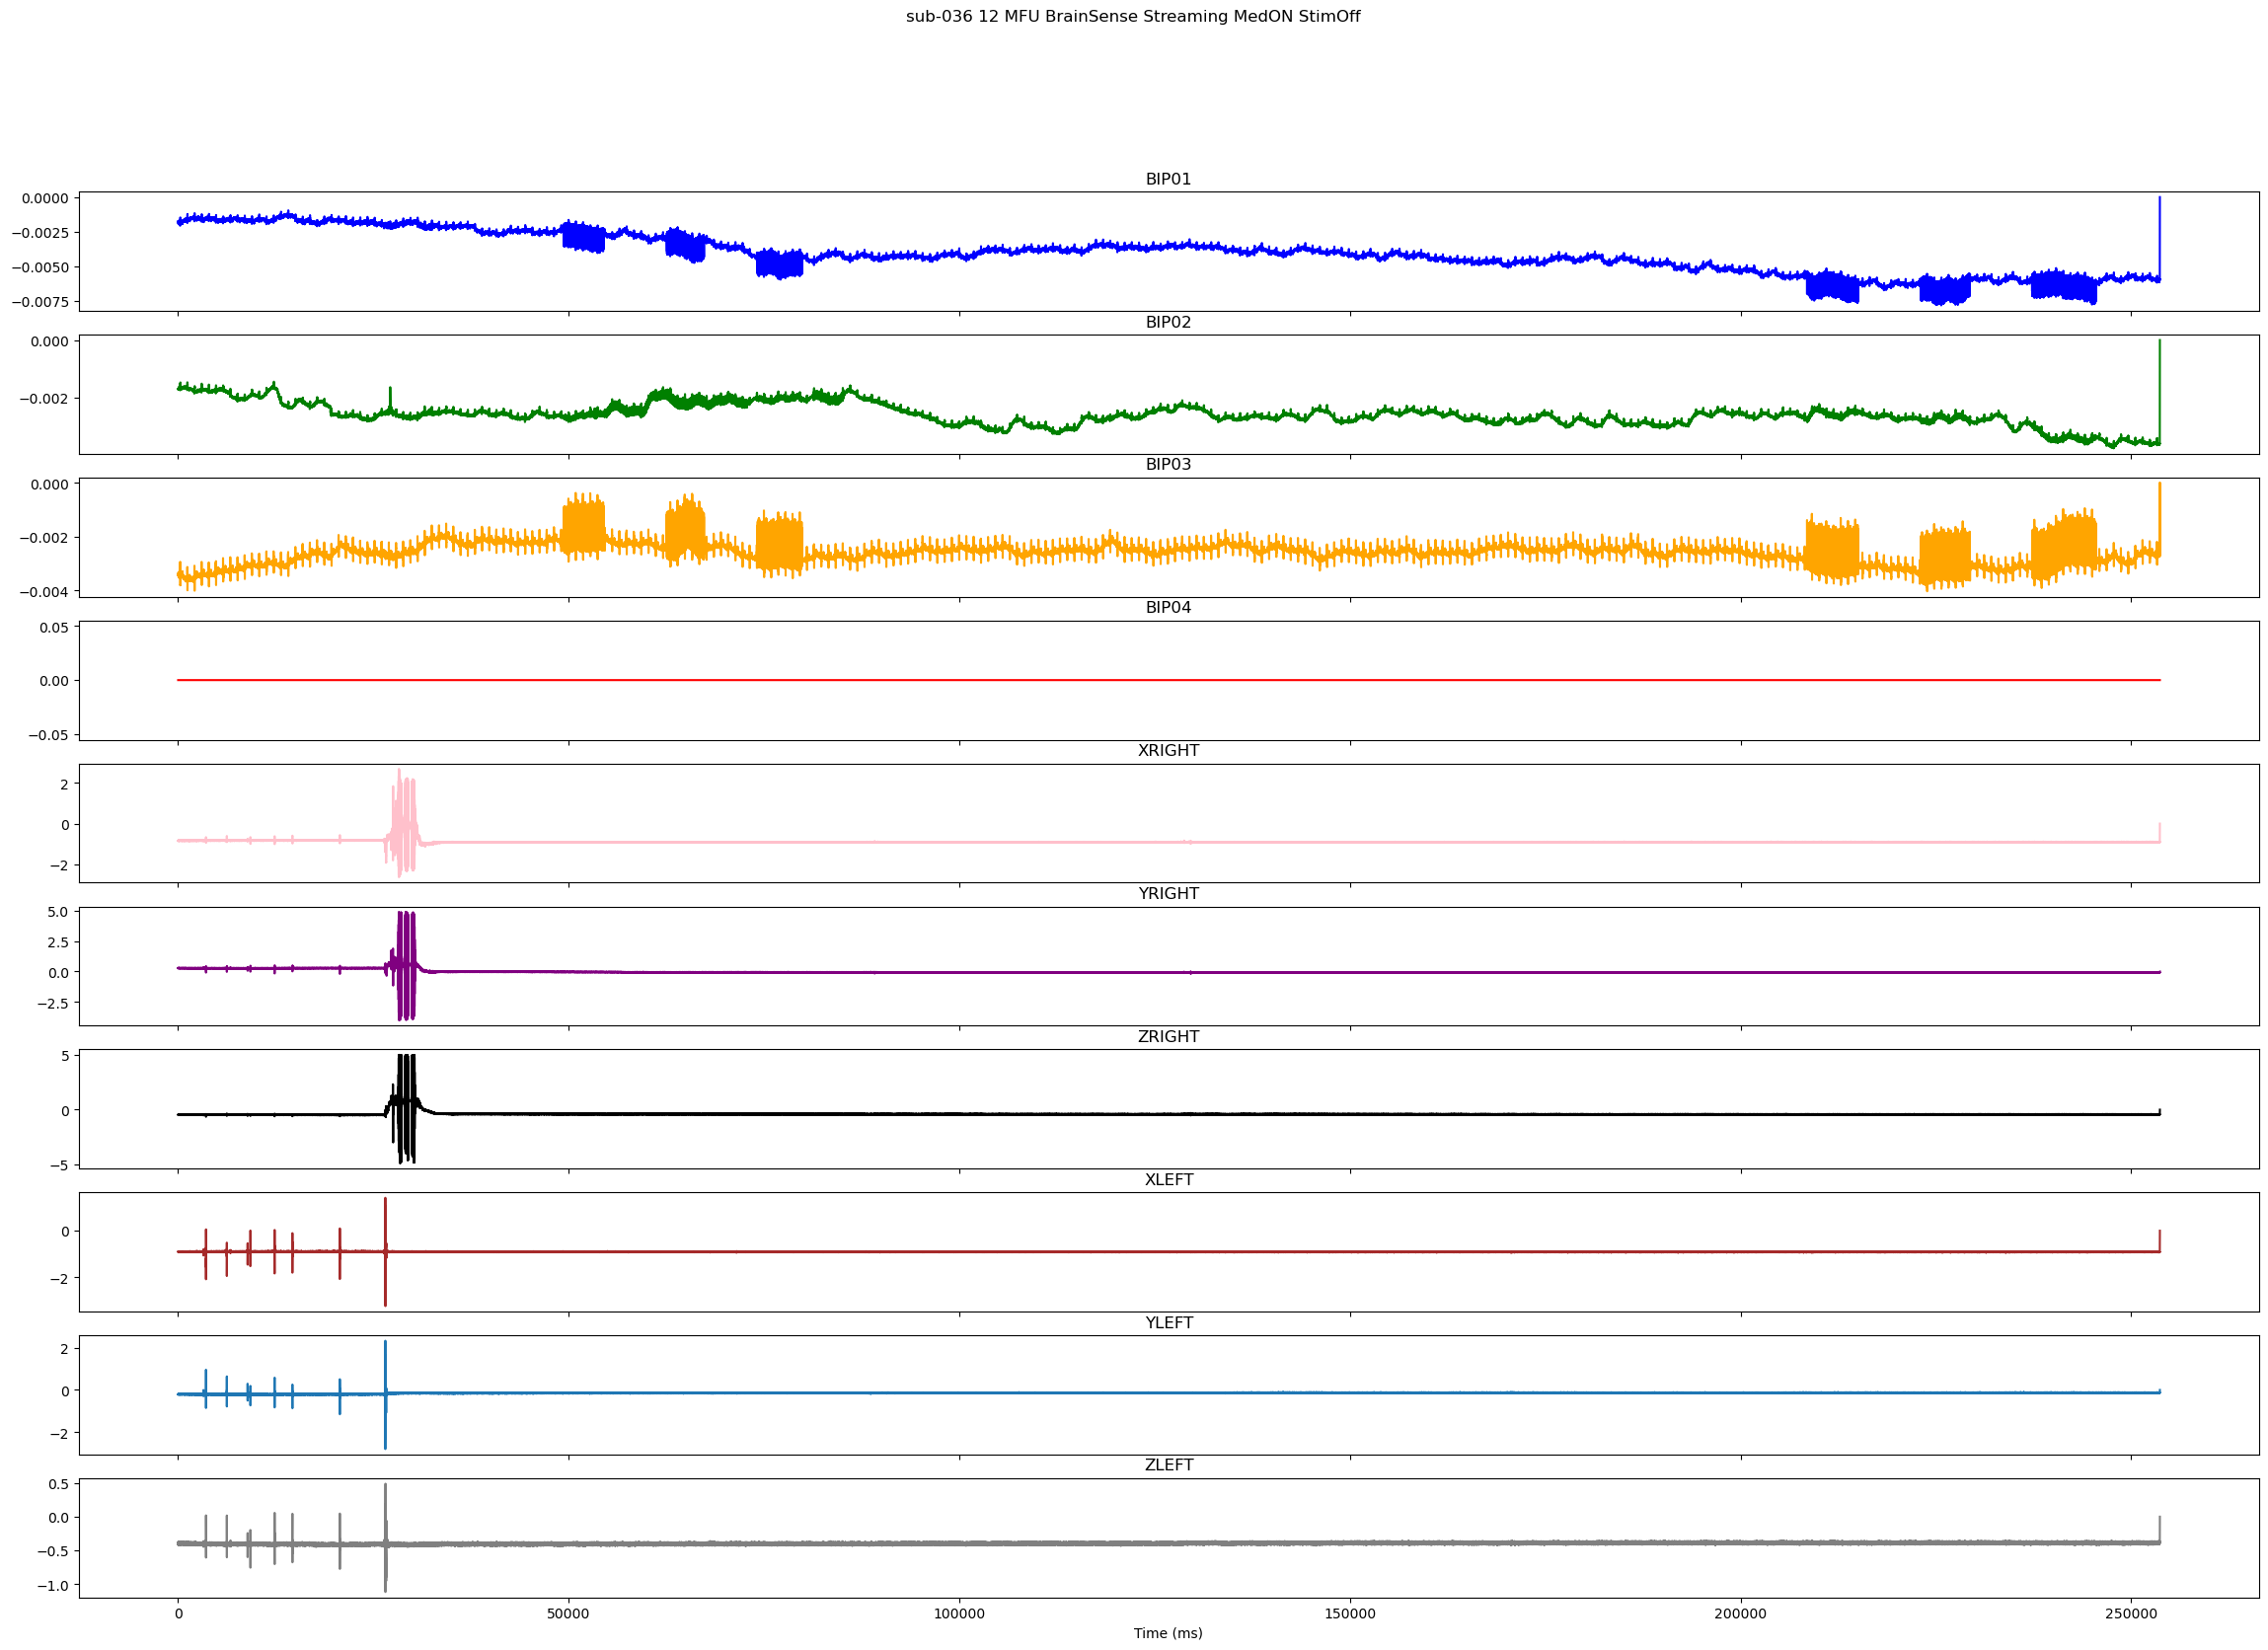

In [25]:
Example_dir = dirname(realpath('C:\\Users\\Juliette\\OneDrive - Charité - Universitätsmedizin Berlin\\Documents\\MATLAB\\RawFiles\\TMSi files\\sub-033\\18MFU\\MedON\\Sub_033_18MFU_M1S0_BrStr_Rest - 20230201T144535')) # directory of this file
modules_dir = join(Example_dir, '..') # directory with all modules (I don't quite understand this line)
measurements_dir = join(Example_dir, '../measurements') # directory with all measurements (same, I don't see why we need this line)
sys.path.append(modules_dir)


TMSi_data = Poly5Reader()

# Extract the samples and channel names from the Poly5Reader object
samples = TMSi_data.samples
ch_names = TMSi_data.ch_names

# Conversion to MNE raw array

toMNE = True
mne_object = TMSi_data.read_data_MNE()

# Retrieve the MNE RawArray info and sample data
info_mne = mne_object.info
samples_mne = mne_object._data
    
# mne_object.plot(start = 5, duration = 5, n_channels = 2) (only if I want to plot in interactive viewer)

n_chan = len(mne_object.ch_names)
time_duration = (mne_object.n_times/mne_object.info['sfreq']).astype(float)
time_duration_ms=time_duration*1000

print(     
	f'The data object has:\n\t{mne_object.n_times} time samples,'      
	f'\n\tand a sample frequency of {mne_object.info["sfreq"]} Hz'      
	f'\n\twith a recording duration of {time_duration} seconds.'      
	f'\n\t{n_chan} channels were labeled as \n{mne_object.ch_names}.')

x_time=np.arange(0,time_duration_ms,time_duration_ms/mne_object.n_times)


BIP01 = mne_object.get_data()[38]
BIP02 = mne_object.get_data()[39]
BIP03 = mne_object.get_data()[40]
BIP04 = mne_object.get_data()[41]
XRIGHT = mne_object.get_data()[42]
YRIGHT = mne_object.get_data()[43]
ZRIGHT = mne_object.get_data()[44]
XLEFT = mne_object.get_data()[45]
YLEFT = mne_object.get_data()[46]
ZLEFT = mne_object.get_data()[47]

fig, axs = plt.subplots(10)
fig.suptitle('sub-036 12 MFU BrainSense Streaming MedON StimOff')
axs[0].plot(x_time,BIP01,color='blue')
axs[0].set_title('BIP01')
axs[1].plot(x_time,BIP02,color='green')
axs[1].set_title('BIP02')
axs[2].plot(x_time,BIP03,color='orange')
axs[2].set_title('BIP03')
axs[3].plot(x_time,BIP04,color='red')
axs[3].set_title('BIP04')
axs[4].plot(x_time,XRIGHT,color='pink')
axs[4].set_title('XRIGHT')
axs[5].plot(x_time,YRIGHT,color='purple')
axs[5].set_title('YRIGHT')
axs[6].plot(x_time,ZRIGHT,color='black')
axs[6].set_title('ZRIGHT')
axs[7].plot(x_time,XLEFT,color='brown')
axs[7].set_title('XLEFT')
axs[8].plot(x_time,YLEFT)
axs[8].set_title('YLEFT')
axs[9].plot(x_time,ZLEFT,color='grey')
axs[9].set_title('ZLEFT')
axs[9].set_xlabel('Time (ms)')
for ax in axs.flat:
    ax.label_outer()
fig.set_size_inches(28.5, 18.5)	

In [26]:
mne_object.plot(start = 5, duration = 5, n_channels = 2)

# Stim artefacts are picked up in BIP01, BIP02, BIP03 channels


Channels marked as bad:
none


Condition: Sub-036 12MFU MedOn Stim Off Streaming Rest/Sync: ZOOM on artefact

Reading file  C:/Users/Juliette/OneDrive - Charité - Universitätsmedizin Berlin/Documents/MATLAB/RawFiles/TMSi files/sub-036/12MFU/MedON/Sub036_12mfu_M1S0_BStr_Rest__ - 20230201T133415/Sub036_12mfu_M1S0_BStr_Rest__-20230201T133415.DATA.Poly5
	 Number of samples:  1039068 
	 Number of channels:  50 
	 Sample rate: 4096 Hz
Done reading data.
Creating RawArray with float64 data, n_channels=50, n_times=1039068
    Range : 0 ... 1039067 =      0.000 ...   253.678 secs
Ready.


c:\Users\Juliette\OneDrive\Documents\Code\tmsi-python-interface-main\TMSiFileFormats\file_readers\poly5reader.py:92: RuntimeWarning: Channel names are not unique, found duplicates for: {'Z', 'Y', 'X'}. Applying running numbers for duplicates.
  info = mne.create_info(ch_names=labels, sfreq=fs, ch_types=types_clean)


The data object has:
	1039068 time samples,
	and a sample frequency of 4096.0 Hz
	with a recording duration of 253.6787109375 seconds.
	50 channels were labeled as 
['STNR01MT', 'STNR02MT', 'STNR03MT', 'STNR04MT', 'STNR05MT', 'STNR06MT', 'STNR07MT', 'STNR08MT', 'STNL01MT', 'STNL02MT', 'F5', 'F1', 'F2', 'F6', 'FC3', 'FCz', 'FC4', 'C5', 'C1', 'C2', 'C6', 'CP3', 'CPz', 'CP4', 'P5', 'P1', 'P2', 'P6', 'PO5', 'PO3', 'PO4', 'PO6', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'BIP 01', 'BIP 02', 'BIP 03', 'BIP 04', 'X-0', 'Y-0', 'Z-0', 'X-1', 'Y-1', 'Z-1', 'STATUS', 'Counter 2power24'].


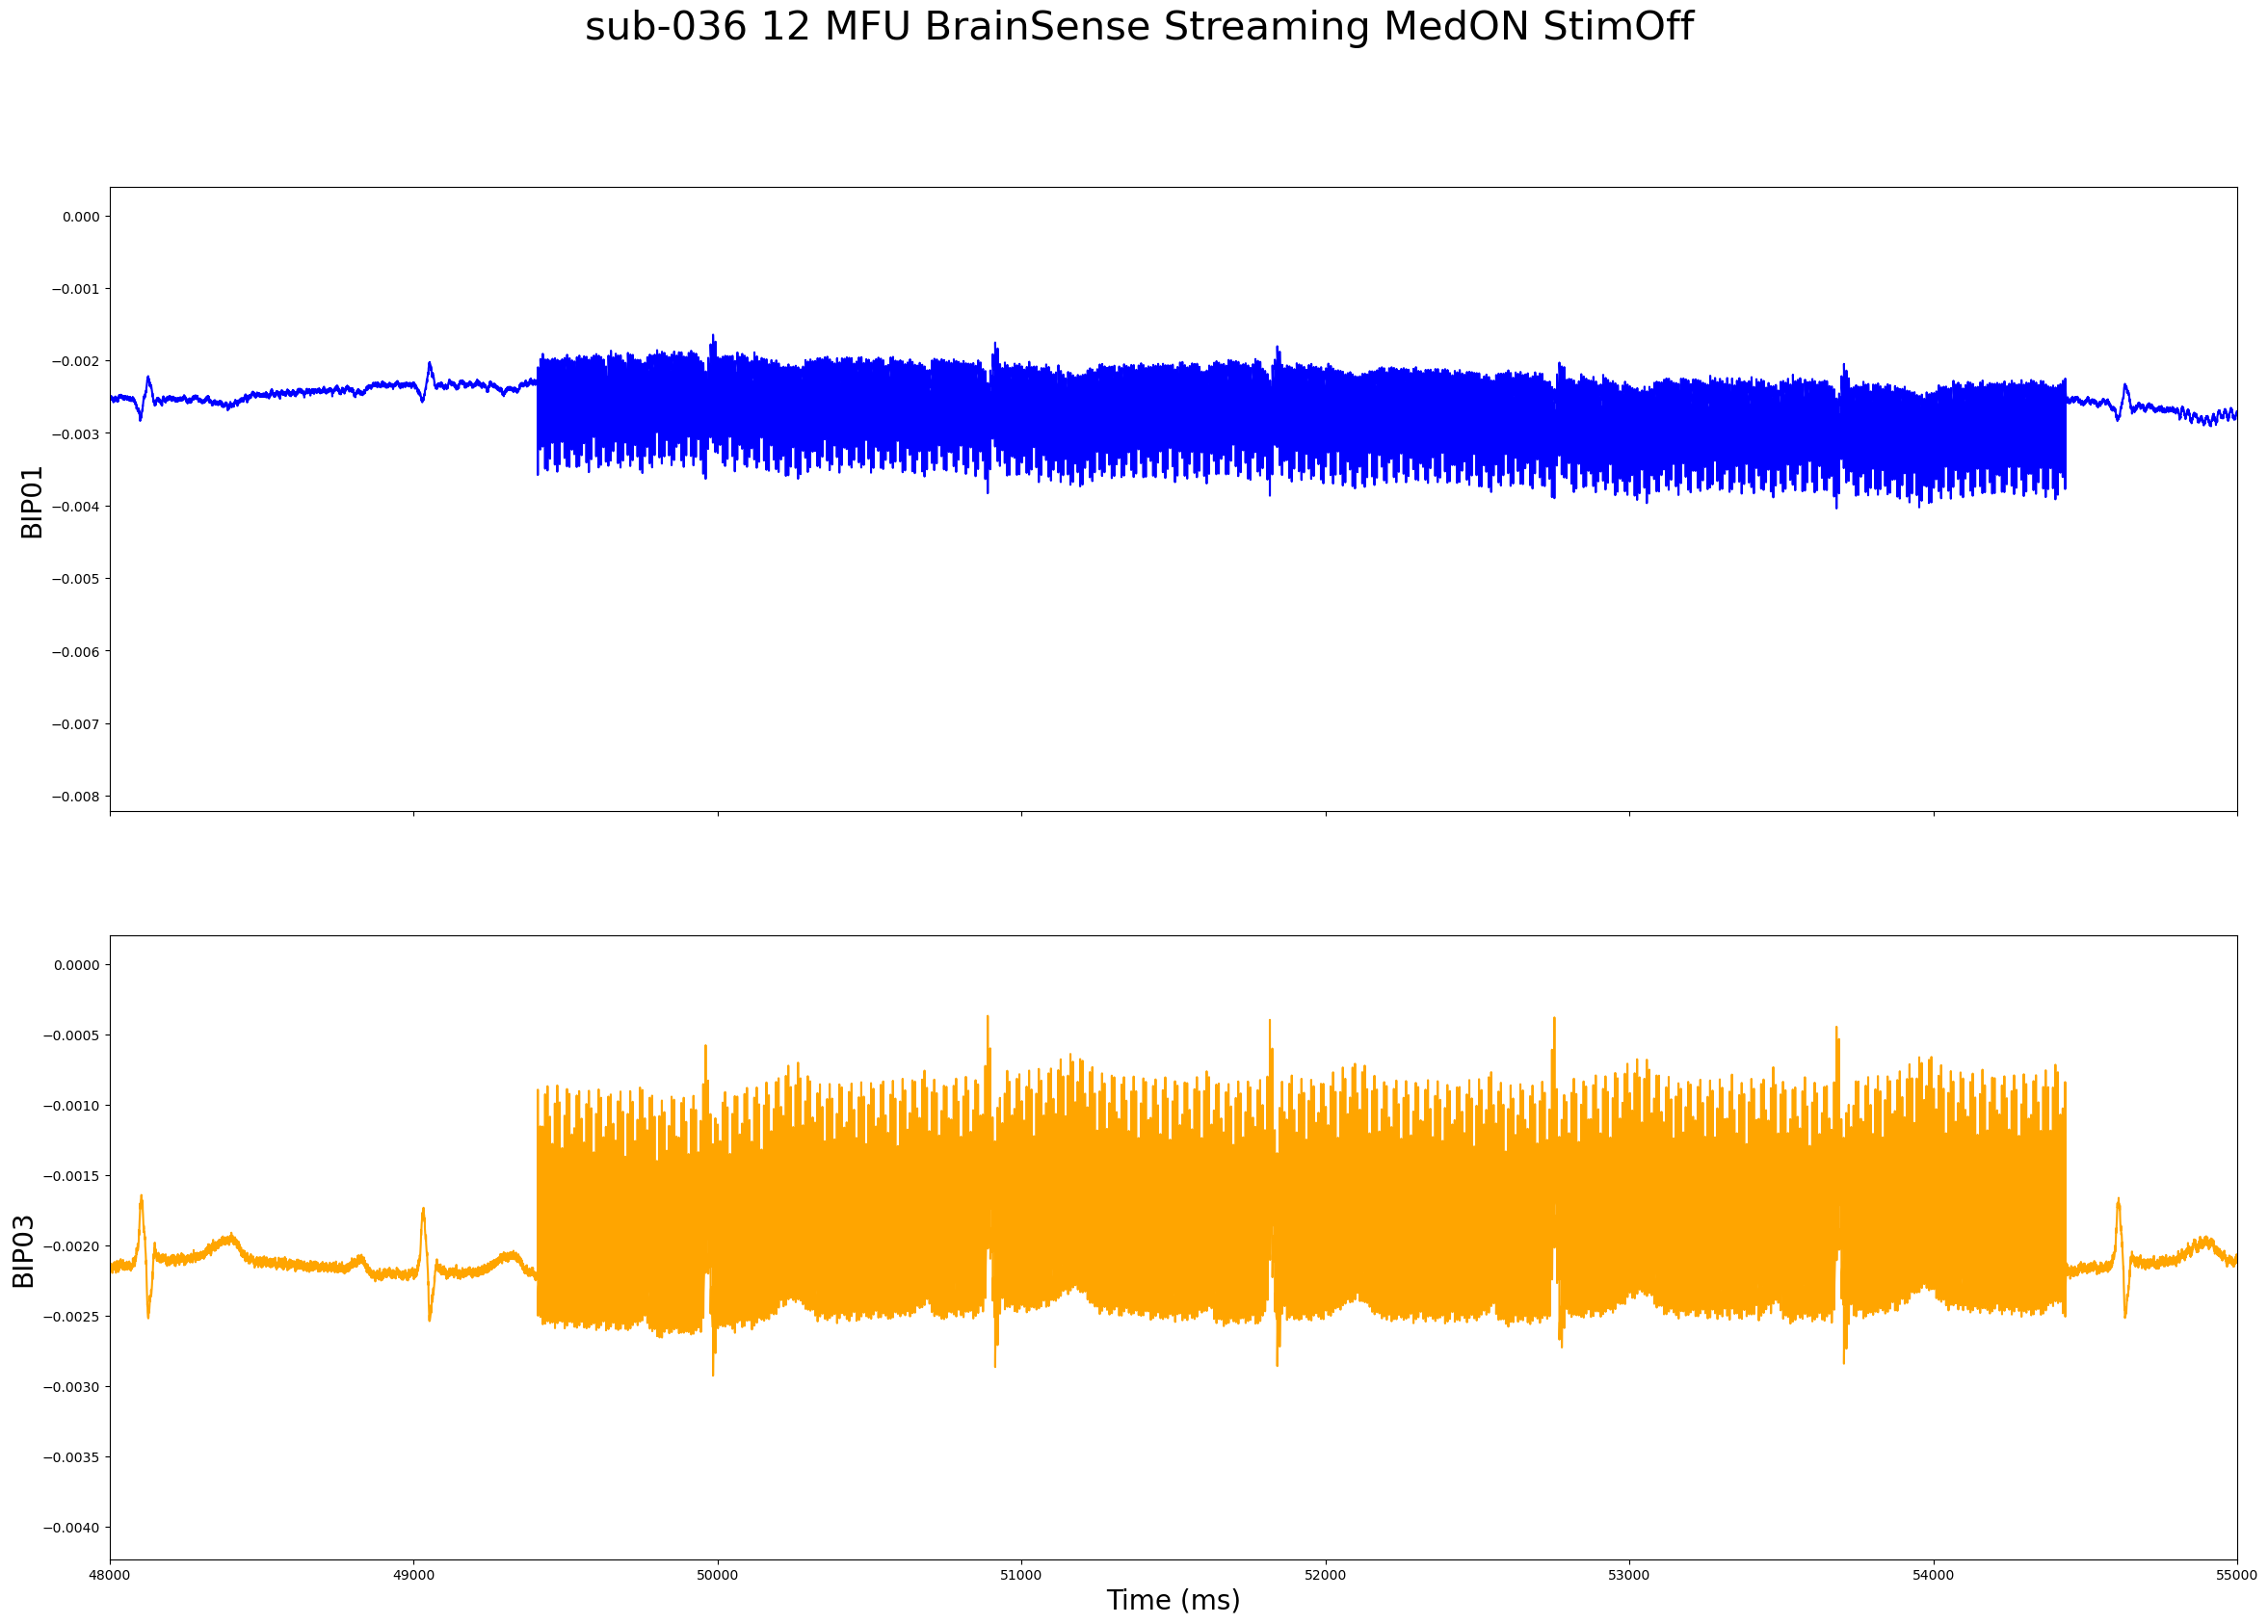

In [17]:
Example_dir = dirname(realpath('C:\\Users\\Juliette\\OneDrive - Charité - Universitätsmedizin Berlin\\Documents\\MATLAB\\RawFiles\\TMSi files\\sub-033\\18MFU\\MedON\\Sub_033_18MFU_M1S0_BrStr_Rest - 20230201T144535')) # directory of this file
modules_dir = join(Example_dir, '..') # directory with all modules (I don't quite understand this line)
measurements_dir = join(Example_dir, '../measurements') # directory with all measurements (same, I don't see why we need this line)
sys.path.append(modules_dir)


TMSi_data = Poly5Reader()

# Extract the samples and channel names from the Poly5Reader object
samples = TMSi_data.samples
ch_names = TMSi_data.ch_names

# Conversion to MNE raw array

toMNE = True
mne_object = TMSi_data.read_data_MNE()

# Retrieve the MNE RawArray info and sample data
info_mne = mne_object.info
samples_mne = mne_object._data
    
# mne_object.plot(start = 5, duration = 5, n_channels = 2) (only if I want to plot in interactive viewer)

n_chan = len(mne_object.ch_names)
time_duration = (mne_object.n_times/mne_object.info['sfreq']).astype(float)
time_duration_ms=time_duration*1000

print(     
	f'The data object has:\n\t{mne_object.n_times} time samples,'      
	f'\n\tand a sample frequency of {mne_object.info["sfreq"]} Hz'      
	f'\n\twith a recording duration of {time_duration} seconds.'      
	f'\n\t{n_chan} channels were labeled as \n{mne_object.ch_names}.')

x_time=np.arange(0,time_duration_ms,time_duration_ms/mne_object.n_times)


BIP01 = mne_object.get_data()[38]
BIP02 = mne_object.get_data()[39]
BIP03 = mne_object.get_data()[40]
BIP04 = mne_object.get_data()[41]
XRIGHT = mne_object.get_data()[42]
YRIGHT = mne_object.get_data()[43]
ZRIGHT = mne_object.get_data()[44]
XLEFT = mne_object.get_data()[45]
YLEFT = mne_object.get_data()[46]
ZLEFT = mne_object.get_data()[47]

x_min=48000
x_max=55000
y_min=-200
y_max=200

fig, axs = plt.subplots(2)
fig.suptitle('sub-036 12 MFU BrainSense Streaming MedON StimOff',size=30)
axs[0].set_xlim(x_min,x_max)
axs[1].set_xlim(x_min,x_max)
axs[0].plot(x_time,BIP01,color='blue')
axs[0].set_ylabel('BIP01',size=20)
axs[1].plot(x_time,BIP03,color='orange')
axs[1].set_ylabel('BIP03',size=20)
axs[1].set_xlabel('Time (ms)',size=20)
for ax in axs.flat:
    ax.label_outer()
fig.set_size_inches(28.5, 18.5)	

Condition: Sub-036 12MFU MedOn Stim Off Indefinite Streaming:

Reading file  C:/Users/Juliette/OneDrive - Charité - Universitätsmedizin Berlin/Documents/MATLAB/RawFiles/TMSi files/sub-036/12MFU/MedON/Sub036_12mfu_M1S0_IS_Rest__ - 20230201T133037/Sub036_12mfu_M1S0_IS_Rest__-20230201T133037.DATA.Poly5
	 Number of samples:  820692 
	 Number of channels:  50 
	 Sample rate: 4096 Hz
Done reading data.
Creating RawArray with float64 data, n_channels=50, n_times=820692
    Range : 0 ... 820691 =      0.000 ...   200.364 secs
Ready.


c:\Users\Juliette\OneDrive\Documents\Code\tmsi-python-interface-main\TMSiFileFormats\file_readers\poly5reader.py:92: RuntimeWarning: Channel names are not unique, found duplicates for: {'X', 'Z', 'Y'}. Applying running numbers for duplicates.
  info = mne.create_info(ch_names=labels, sfreq=fs, ch_types=types_clean)


The data object has:
	820692 time samples,
	and a sample frequency of 4096.0 Hz
	with a recording duration of 200.3642578125 seconds.
	50 channels were labeled as 
['STNR01MT', 'STNR02MT', 'STNR03MT', 'STNR04MT', 'STNR05MT', 'STNR06MT', 'STNR07MT', 'STNR08MT', 'STNL01MT', 'STNL02MT', 'F5', 'F1', 'F2', 'F6', 'FC3', 'FCz', 'FC4', 'C5', 'C1', 'C2', 'C6', 'CP3', 'CPz', 'CP4', 'P5', 'P1', 'P2', 'P6', 'PO5', 'PO3', 'PO4', 'PO6', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'BIP 01', 'BIP 02', 'BIP 03', 'BIP 04', 'X-0', 'Y-0', 'Z-0', 'X-1', 'Y-1', 'Z-1', 'STATUS', 'Counter 2power24'].


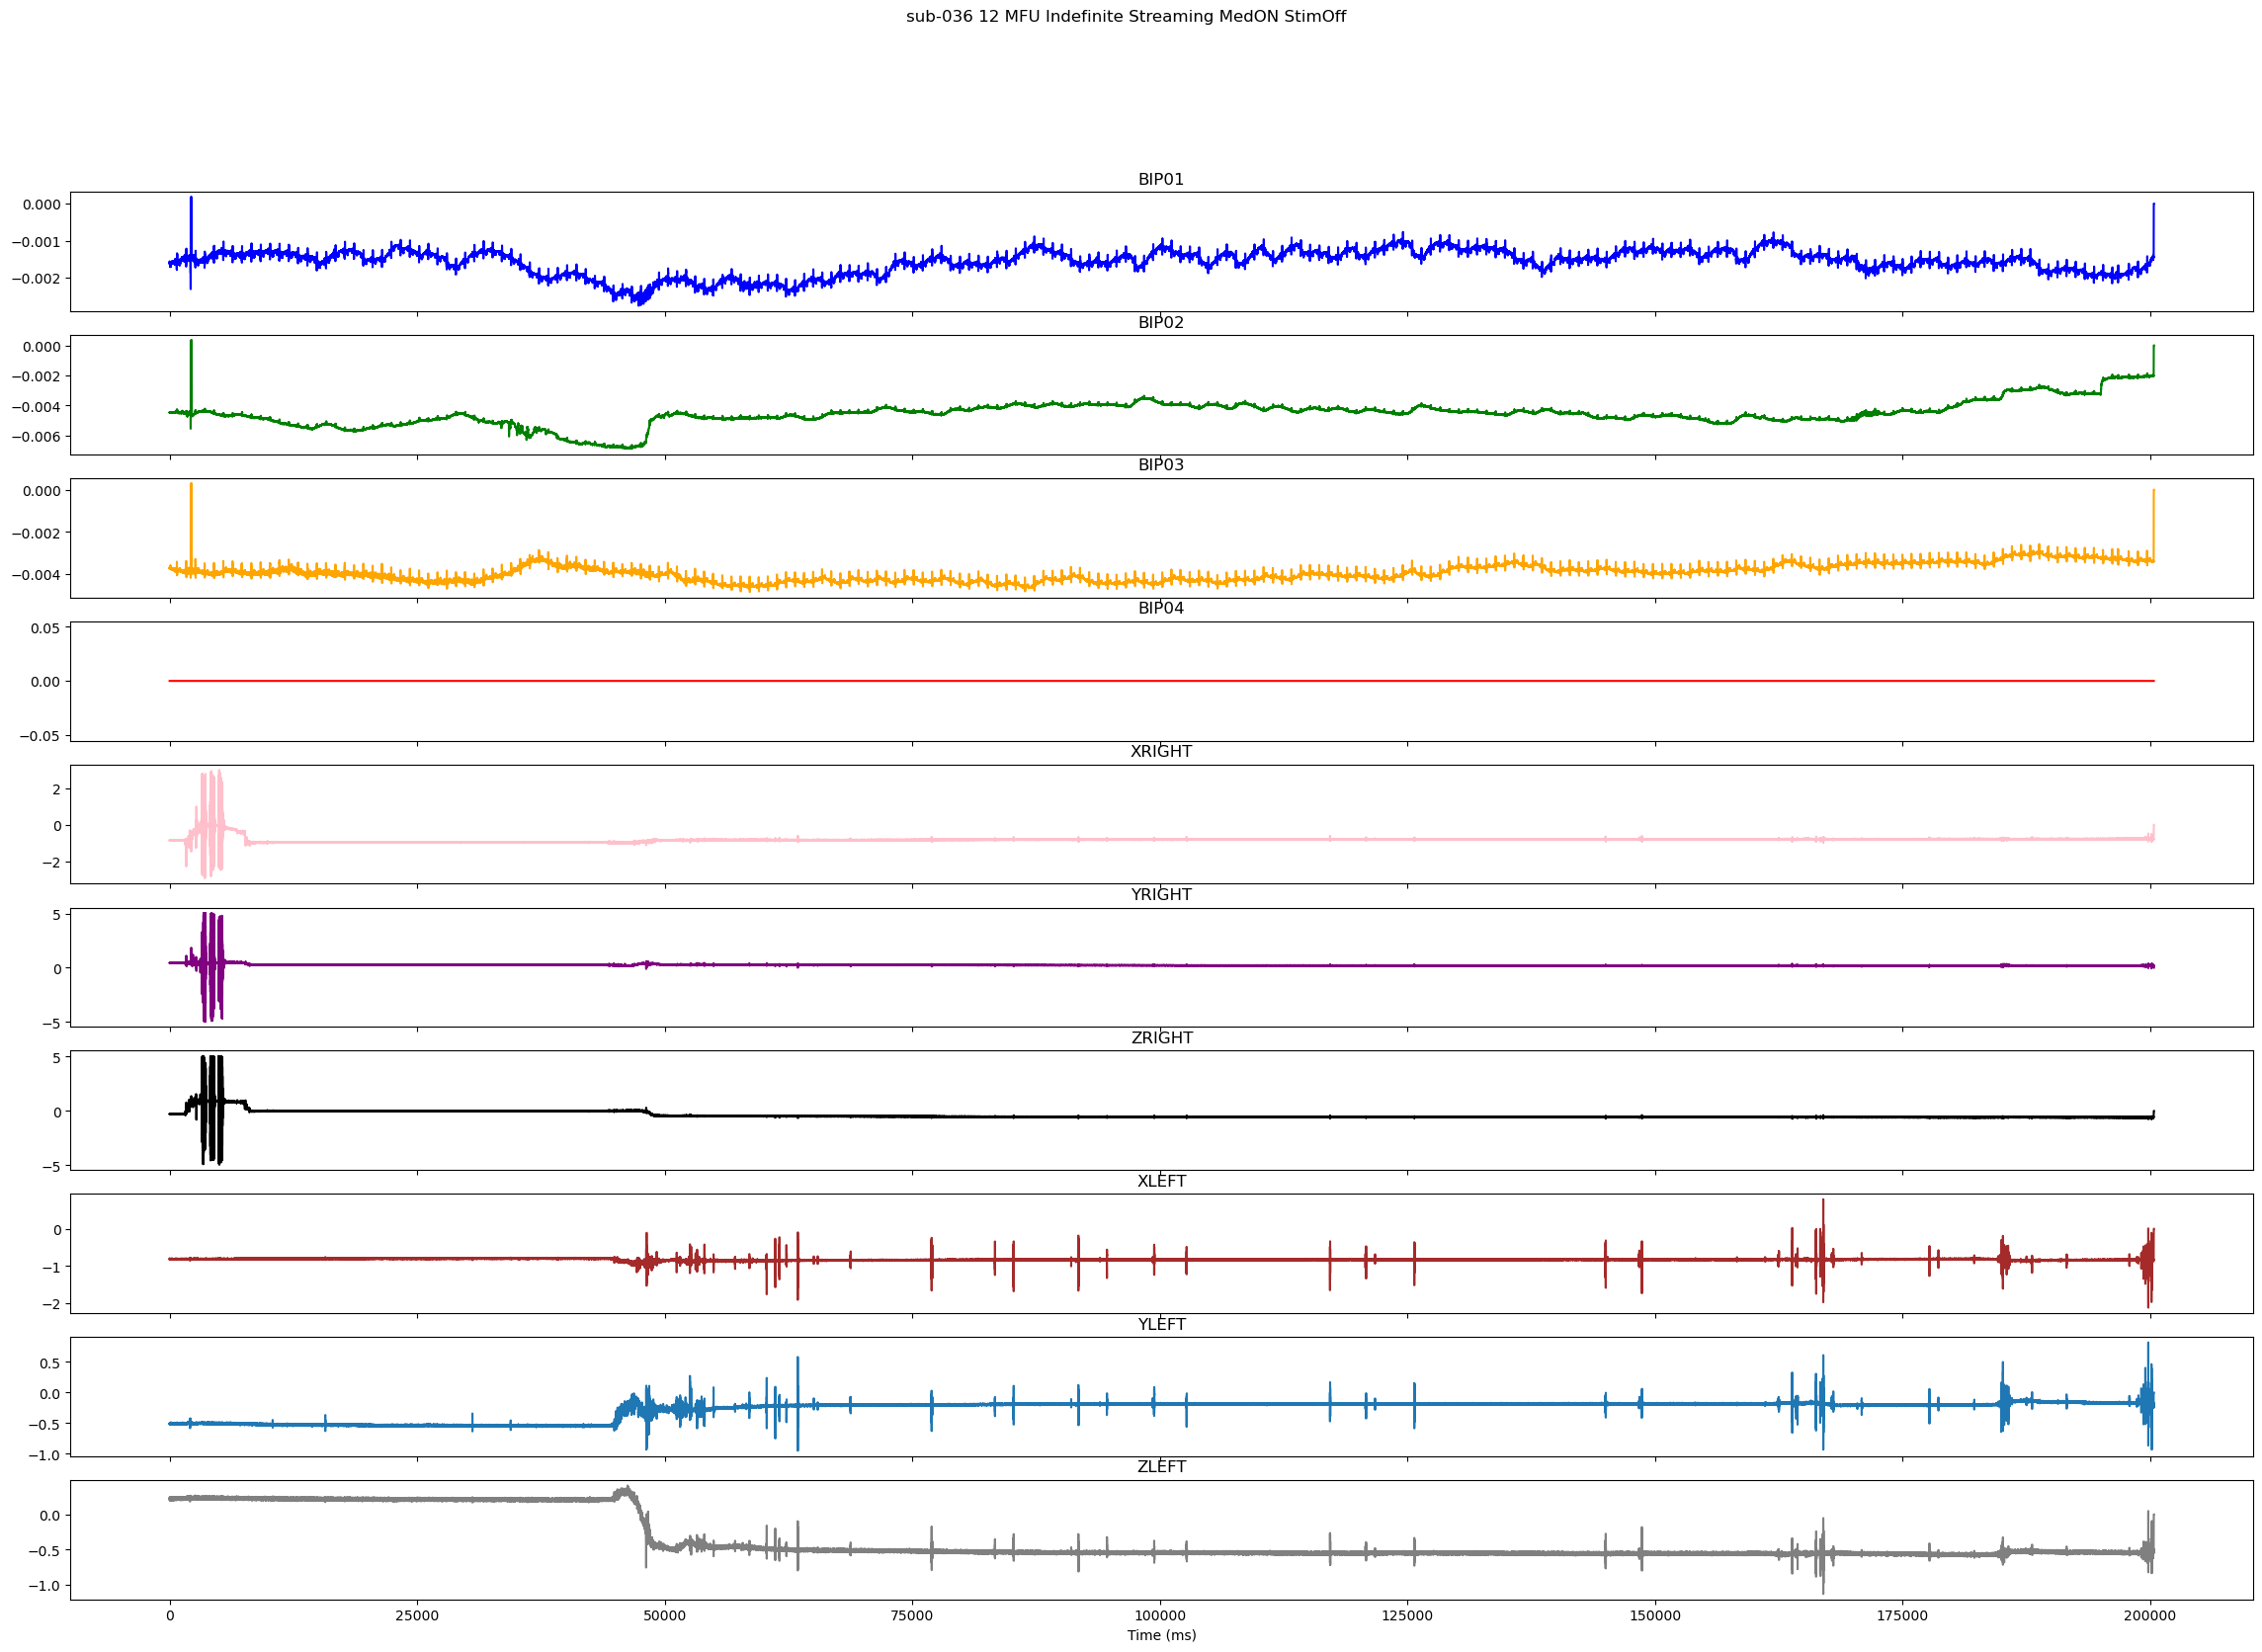

In [27]:
Example_dir = dirname(realpath('C:\\Users\\Juliette\\OneDrive - Charité - Universitätsmedizin Berlin\\Documents\\MATLAB\\RawFiles\\TMSi files\\sub-033\\18MFU\\MedON\\Sub_033_18MFU_M1S0_BrStr_Rest - 20230201T144535')) # directory of this file
modules_dir = join(Example_dir, '..') # directory with all modules (I don't quite understand this line)
measurements_dir = join(Example_dir, '../measurements') # directory with all measurements (same, I don't see why we need this line)
sys.path.append(modules_dir)


TMSi_data = Poly5Reader()

# Extract the samples and channel names from the Poly5Reader object
samples = TMSi_data.samples
ch_names = TMSi_data.ch_names

# Conversion to MNE raw array

toMNE = True
mne_object = TMSi_data.read_data_MNE()

# Retrieve the MNE RawArray info and sample data
info_mne = mne_object.info
samples_mne = mne_object._data
    
# mne_object.plot(start = 5, duration = 5, n_channels = 2) (only if I want to plot in interactive viewer)

n_chan = len(mne_object.ch_names)
time_duration = (mne_object.n_times/mne_object.info['sfreq']).astype(float)
time_duration_ms=time_duration*1000

print(     
	f'The data object has:\n\t{mne_object.n_times} time samples,'      
	f'\n\tand a sample frequency of {mne_object.info["sfreq"]} Hz'      
	f'\n\twith a recording duration of {time_duration} seconds.'      
	f'\n\t{n_chan} channels were labeled as \n{mne_object.ch_names}.')

x_time=np.arange(0,time_duration_ms,time_duration_ms/mne_object.n_times)


BIP01 = mne_object.get_data()[38]
BIP02 = mne_object.get_data()[39]
BIP03 = mne_object.get_data()[40]
BIP04 = mne_object.get_data()[41]
XRIGHT = mne_object.get_data()[42]
YRIGHT = mne_object.get_data()[43]
ZRIGHT = mne_object.get_data()[44]
XLEFT = mne_object.get_data()[45]
YLEFT = mne_object.get_data()[46]
ZLEFT = mne_object.get_data()[47]

fig, axs = plt.subplots(10)
fig.suptitle('sub-036 12 MFU Indefinite Streaming MedON StimOff')
axs[0].plot(x_time,BIP01,color='blue')
axs[0].set_title('BIP01')
axs[1].plot(x_time,BIP02,color='green')
axs[1].set_title('BIP02')
axs[2].plot(x_time,BIP03,color='orange')
axs[2].set_title('BIP03')
axs[3].plot(x_time,BIP04,color='red')
axs[3].set_title('BIP04')
axs[4].plot(x_time,XRIGHT,color='pink')
axs[4].set_title('XRIGHT')
axs[5].plot(x_time,YRIGHT,color='purple')
axs[5].set_title('YRIGHT')
axs[6].plot(x_time,ZRIGHT,color='black')
axs[6].set_title('ZRIGHT')
axs[7].plot(x_time,XLEFT,color='brown')
axs[7].set_title('XLEFT')
axs[8].plot(x_time,YLEFT)
axs[8].set_title('YLEFT')
axs[9].plot(x_time,ZLEFT,color='grey')
axs[9].set_title('ZLEFT')
axs[9].set_xlabel('Time (ms)')
for ax in axs.flat:
    ax.label_outer()
fig.set_size_inches(28.5, 18.5)	

In [28]:
mne_object.plot(start = 5, duration = 5, n_channels = 2)

# no artefact except at the end of the recording in BIP01 and BIP02, unrelated to anything based on the video...
